In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import contourpy
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as colors
from matplotlib.ticker import FormatStrFormatter
import numpy as np
from _FigureJiazeHelper import *
from _DetectabilityWithMeta import *
from _CommunityDetect import *
from EXPERIMENT_MinoritySameDegree import *
from scipy.optimize import linear_sum_assignment

%load_ext autoreload
%autoreload 2

In [2]:
# Matplotlib settings

# plt.style.use('seaborn-whitegrid')
plt.rc('figure', figsize=(8, 5))
plt.rc('font', size=10)
plt.rc('font', family='sans-serif')
plt.rcParams['font.sans-serif'] = 'verdana'
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.edgecolor'] = basic_line_color
plt.rcParams['xtick.color'] = basic_line_color
plt.rcParams['ytick.color'] = basic_line_color
plt.rcParams['axes.labelsize'] = 10  # 'large'
plt.rcParams['lines.markersize'] = 12
plt.rcParams['axes.linewidth'] = 0.5

# %matplotlib notebook
%config InlineBackend.figure_format = 'retina'

In [7]:
n = 6000
d = 15
Z_s = 2
Z_b = 2
q = Z_s + Z_b
rho = 0.3
min_delta, max_delta = get_range_delta(d, n, Z_s, Z_b)
delta = 0.004

# Different Average degree

In [22]:
pout = d / n - ((1-rho)**2 / Z_b + rho**2 / Z_s) * delta
pin = pout + delta
pin = 0 if pin < 1e-10 else pin
pout = 0 if pout < 1e-10 else pout
ps = (pin - pout) * np.identity(q) + pout * np.ones((q, q))
n_f = int(n * (Z_s + Z_b) * (Z_b * rho + Z_s * (1 - rho)) / (Z_s * Z_b))
rho_f = Z_b * rho / (Z_b * rho + Z_s * (1 - rho))
n_fq = int(n_f / q)
n_f = int(n_fq * q)
sizes = [[n_fq] * Z_s, [n_fq] * Z_b]
msbm = MetaSBM(n_f, rho_f, ps, sizes)
print(f'pin={pin}, pout={pout}')

Metadata generation done!
pin=0.00534, pout=0.00134


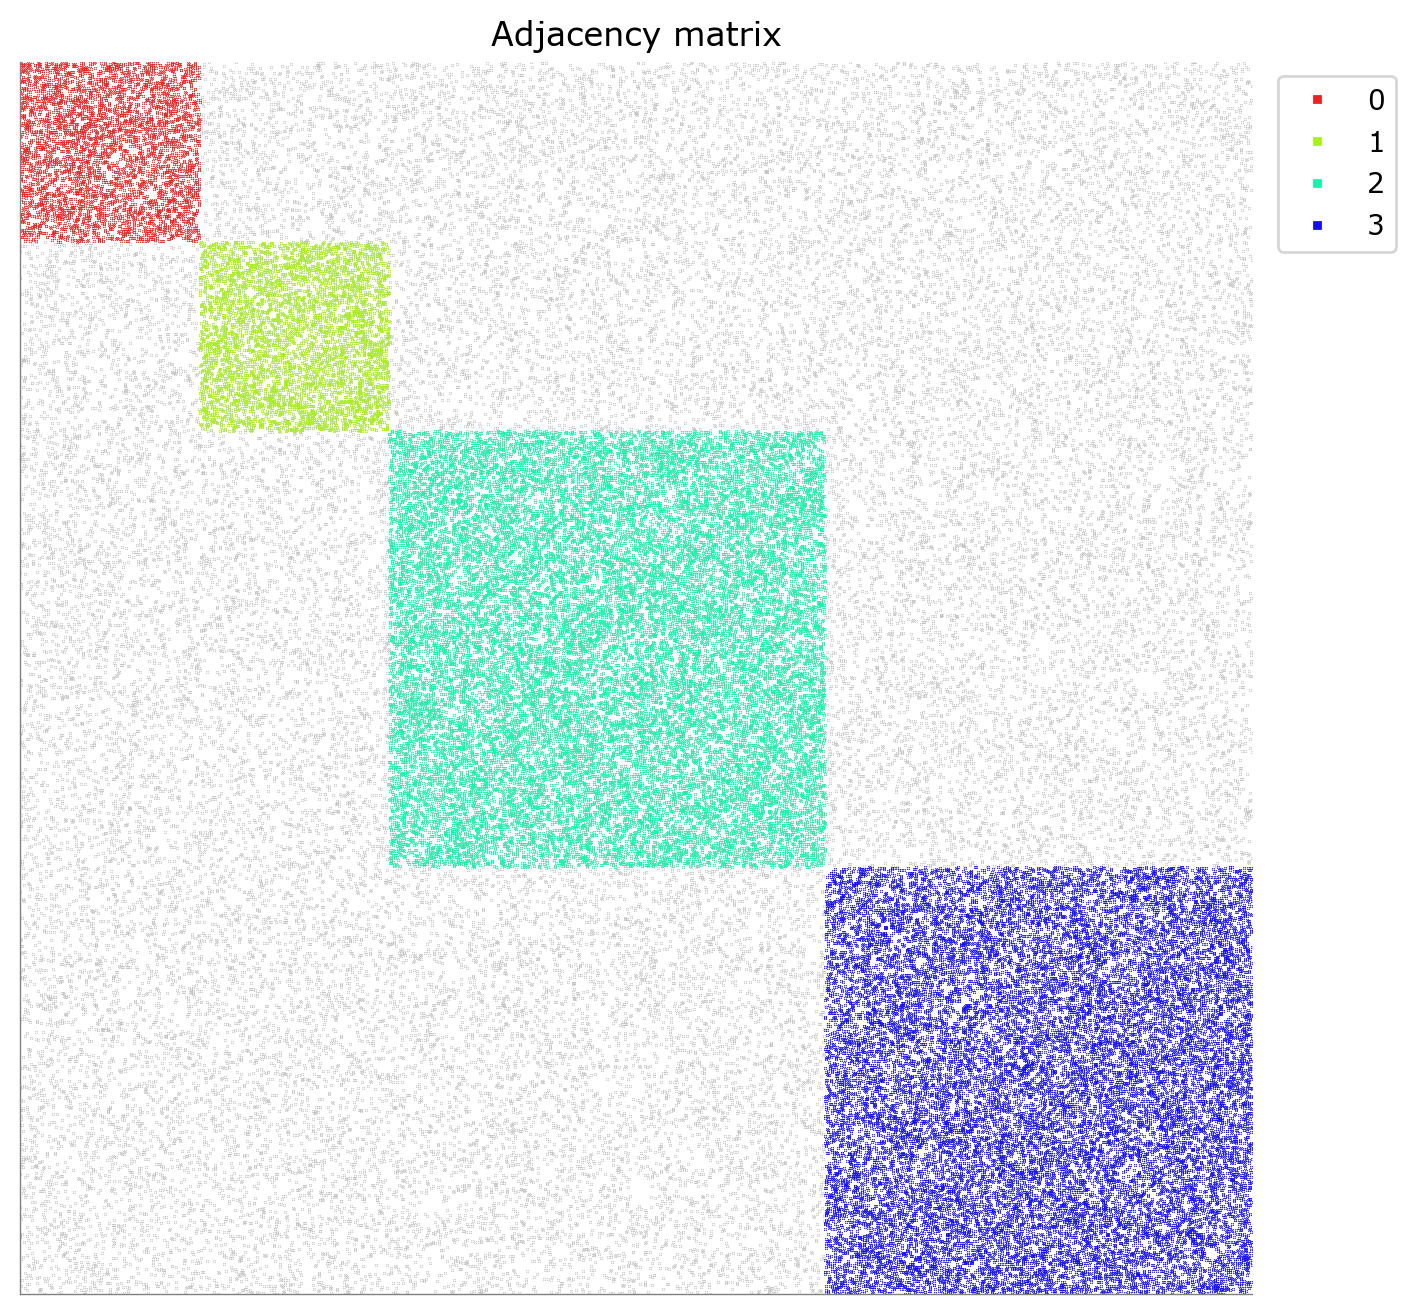

In [23]:
A = msbm.sample()
metaIdSelect = 0
filterA, filterGroupId = msbm.filter(A, metaId=metaIdSelect)
fig = plt.figure(figsize=(8, 8))
widths = [4]
heights = [4]
spec5 = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
# print(A.sum())
c = gen_colors(start=colors_red[0], end=colors_blue[0], n=q)
_, indexes, counts = np.unique(filterGroupId, return_index=True, return_counts=True)
counts = counts[np.argsort(indexes)]
plot_block_matrix(filterA.toarray(), partition_names=list(range(q)), partition_counts=counts, colors=c, ms=0.01)

In [29]:
print(counts)
print(np.sum(filterA.toarray()[:counts[0], :]) / counts[0])
print(np.sum(filterA.toarray()[counts[0]:np.sum(counts[:2]), :]) / counts[1])
print(np.sum(filterA.toarray()[np.sum(counts[:2]):np.sum(counts[:3]), :]) / counts[2])
print(np.sum(filterA.toarray()[np.sum(counts[:3]):, :]) / counts[3])

[ 886  934 2149 2106]
11.62076749435666
11.832976445396145
16.678920428106096
16.383190883190885


# Same average degree

In [14]:
n_f = int(n * (Z_s + Z_b) * (Z_b * rho + Z_s * (1 - rho)) / (Z_s * Z_b))
rho_f = Z_b * rho / (Z_b * rho + Z_s * (1 - rho))
n_fq = int(n_f / q)
n_f = int(n_fq * q)
sizes = [[n_fq] * Z_s, [n_fq] * Z_b]

pout = d / n - (rho / Z_s) * delta
pin_s = pout + delta
pin_b = pout + Z_b * rho / ((1-rho) * Z_s) * delta
pin_s = 0 if pin_s < 1e-10 else pin_s
pin_b = 0 if pin_b < 1e-10 else pin_b
pout = 0 if pout < 1e-10 else pout

ps = pout * np.ones((q, q))
for i in range(Z_s):
    ps[i, i] = pin_s
for i in range(Z_b):
    ps[Z_s+i, Z_s+i] = pin_b

msbm = MetaSBM(n_f, rho_f, ps, sizes)
print(f'pin_s={pin_s}, pin_b={pin_b}, pout={pout}')

Metadata generation done!
pin_s=0.005900000000000001, pin_b=0.003614285714285715, pout=0.0019000000000000002


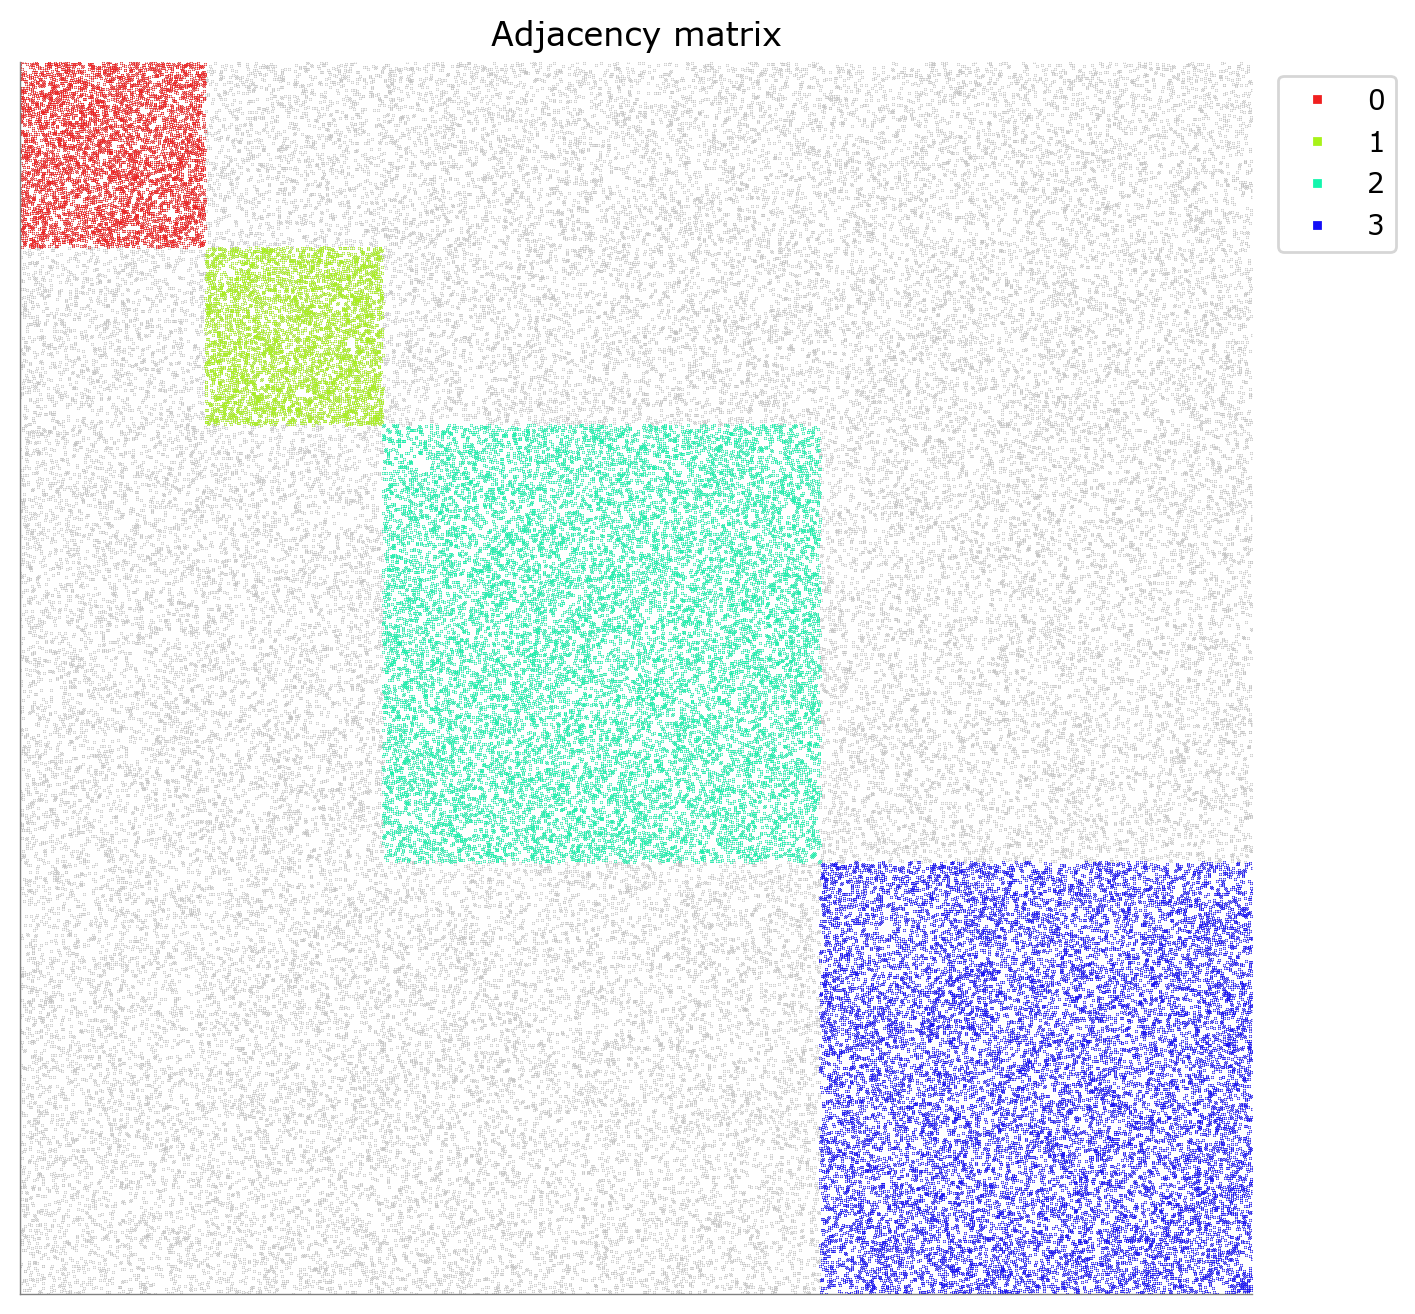

In [15]:
A = msbm.sample()
metaIdSelect = 0
filterA, filterGroupId = msbm.filter(A, metaId=metaIdSelect)
fig = plt.figure(figsize=(8, 8))
widths = [4]
heights = [4]
spec5 = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
# print(A.sum())
c = gen_colors(start=colors_red[0], end=colors_blue[0], n=q)
_, indexes, counts = np.unique(filterGroupId, return_index=True, return_counts=True)
counts = counts[np.argsort(indexes)]
plot_block_matrix(filterA.toarray(), partition_names=list(range(q)), partition_counts=counts, colors=c, ms=0.01)

In [16]:
print(counts)
print(np.sum(filterA.toarray()[:counts[0], :]) / counts[0])
print(np.sum(filterA.toarray()[counts[0]:np.sum(counts[:2]), :]) / counts[1])
print(np.sum(filterA.toarray()[np.sum(counts[:2]):np.sum(counts[:3]), :]) / counts[2])
print(np.sum(filterA.toarray()[np.sum(counts[:3]):, :]) / counts[3])

[ 892  855 2106 2081]
14.862107623318385
14.695906432748538
14.837606837606838
14.636232580490148


In [17]:
P = np.diag([rho / Z_s] * Z_s + [(1 - rho) / Z_b] * Z_b)
Q = n * ps
lambdas = msbm.get_lambdas_general(P, Q)
print(f'lambda_PQ={lambdas}')

lambda_PQ=[15.000000000000002, 3.6, 3.6, 3.5999999999999996]


# Same Average Degree

In [10]:
n_f = int(n * (Z_s + Z_b) * (Z_b * rho + Z_s * (1 - rho)) / (Z_s * Z_b))
rho_f = Z_b * rho / (Z_b * rho + Z_s * (1 - rho))
n_fq = int(n_f / q)
n_f = int(n_fq * q)
sizes = [[n_fq] * Z_s, [n_fq] * Z_b]

pout1 = d / n - (1 / (1- 2 * rho)) * ((1 - rho) ** 2 / Z_b - rho ** 2 / Z_s) * delta
pin = pout1 + delta
pout2 = 2 * d / n - ((1 - rho) / Z_b + rho / Z_s ) * delta - pout1
pout1 = 0 if abs(pout1) < 1e-10 else pout1
pout2 = 0 if abs(pout2) < 1e-10 else pout2
pin = 0 if abs(pin) < 1e-10 else pin

ps = np.zeros((q, q))
for i in range(q):
    for j in range(q):
        if i == j:
            ps[i, i] = pin
        elif i < Z_s and j < Z_s:
            ps[i, j] = pout1
        elif i >= Z_s and j >= Z_s:
            ps[i, j] = pout1
        else:
            ps[i, j] = pout2
msbm = MetaSBM(n_f, rho_f, ps, sizes)
print(f'pin={pin}, pout1={pout1}, pout2={pout2}')

Metadata generation done!
pin=0.0045000000000000005, pout1=0.0005000000000000004, pout2=0.0024999999999999996


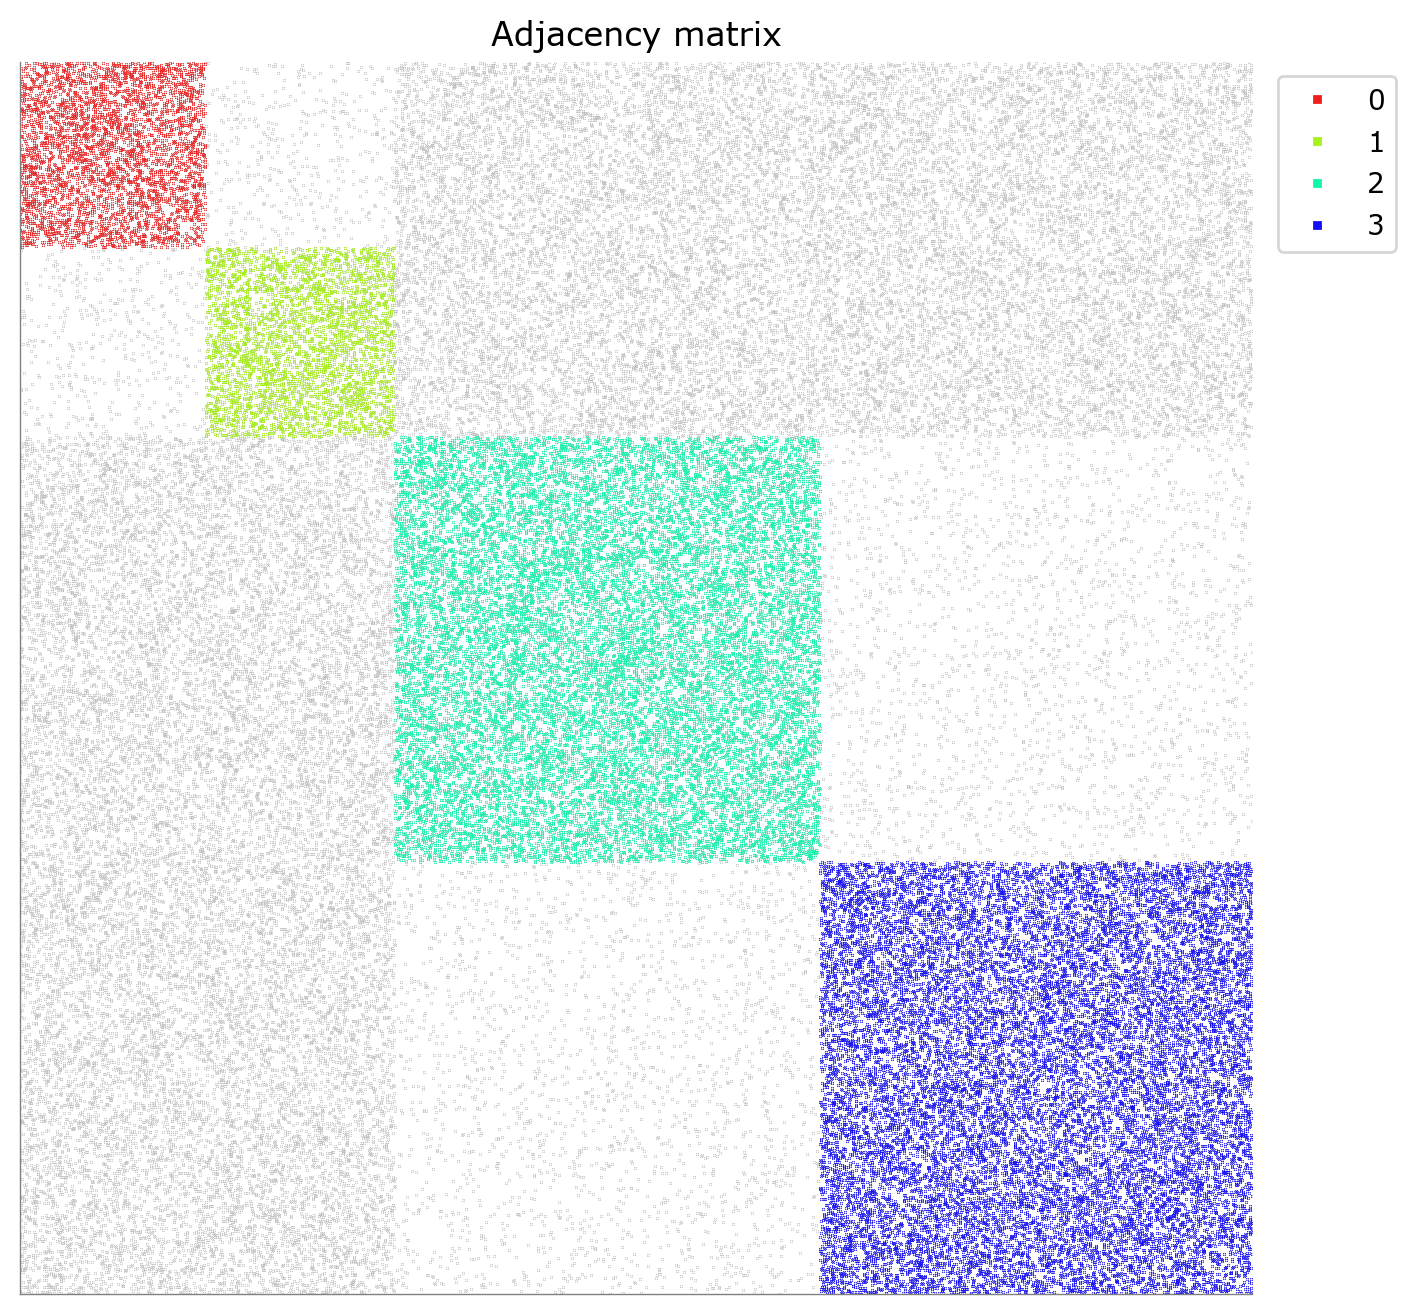

In [11]:
A = msbm.sample()
metaIdSelect = 0
filterA, filterGroupId = msbm.filter(A, metaId=metaIdSelect)
fig = plt.figure(figsize=(8, 8))
widths = [4]
heights = [4]
spec5 = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
# print(A.sum())
c = gen_colors(start=colors_red[0], end=colors_blue[0], n=q)
_, indexes, counts = np.unique(filterGroupId, return_index=True, return_counts=True)
counts = counts[np.argsort(indexes)]
plot_block_matrix(filterA.toarray(), partition_names=list(range(q)), partition_counts=counts, colors=c, ms=0.01)

In [12]:
print(counts)
print(np.sum(filterA.toarray()[:counts[0], :]) / counts[0])
print(np.sum(filterA.toarray()[counts[0]:np.sum(counts[:2]), :]) / counts[1])
print(np.sum(filterA.toarray()[np.sum(counts[:2]):np.sum(counts[:3]), :]) / counts[2])
print(np.sum(filterA.toarray()[np.sum(counts[:3]):, :]) / counts[3])

[ 903  921 2072 2103]
14.98781838316722
14.980456026058633
14.812258687258687
15.042320494531621


In [13]:
P = np.diag([rho / Z_s] * Z_s + [(1 - rho) / Z_b] * Z_b)
Q = n * ps
lambdas = msbm.get_lambdas_general(P, Q)
print(f'lambda_PQ={lambdas}')

lambda_PQ=[14.999999999999991, 8.4, 3.600000000000002, 2.524338098117622e-15]


# First Type show SNR, l3^2/l1, l4^2/l1

In [3]:
# For big n
n = 6000
d = 15
Z_s = 2
Z_b = 2
q = Z_s + Z_b
Withlambda = True
givenNumGroup = False
DC = False
BP = False
learnqby = None
givenTrueEpsilon = False
writeCM = False
additionId = "BH_HomoDegree"
checkSNR = True
homoDegree = True
fileID = 'amiExp24.5.10' + f'_n={n}_q={q}_d={round(d)}_{"lambda" if Withlambda else ""}_' \
                              f'{"givenNumGroup" if givenNumGroup else ""}_' \
                              f'{"DC" if DC else ""}_{"BP" if BP else ""}_' \
                              f'{"givenTrueEpsilon" if givenTrueEpsilon else ""}_{"writeCM" if writeCM else ""}_{"HomoD" if homoDegree else ""}_' \
                              f'{"CheckSNR" if checkSNR else ""}_' \
                              f'{additionId}'
load_path = "./result/detectabilityWithMeta/" + fileID + ".txt"
plot_rhos, plot_zs, sub_ami, sub_num_group, lambdas = read_exp(load_path=load_path, Withlambda=Withlambda)

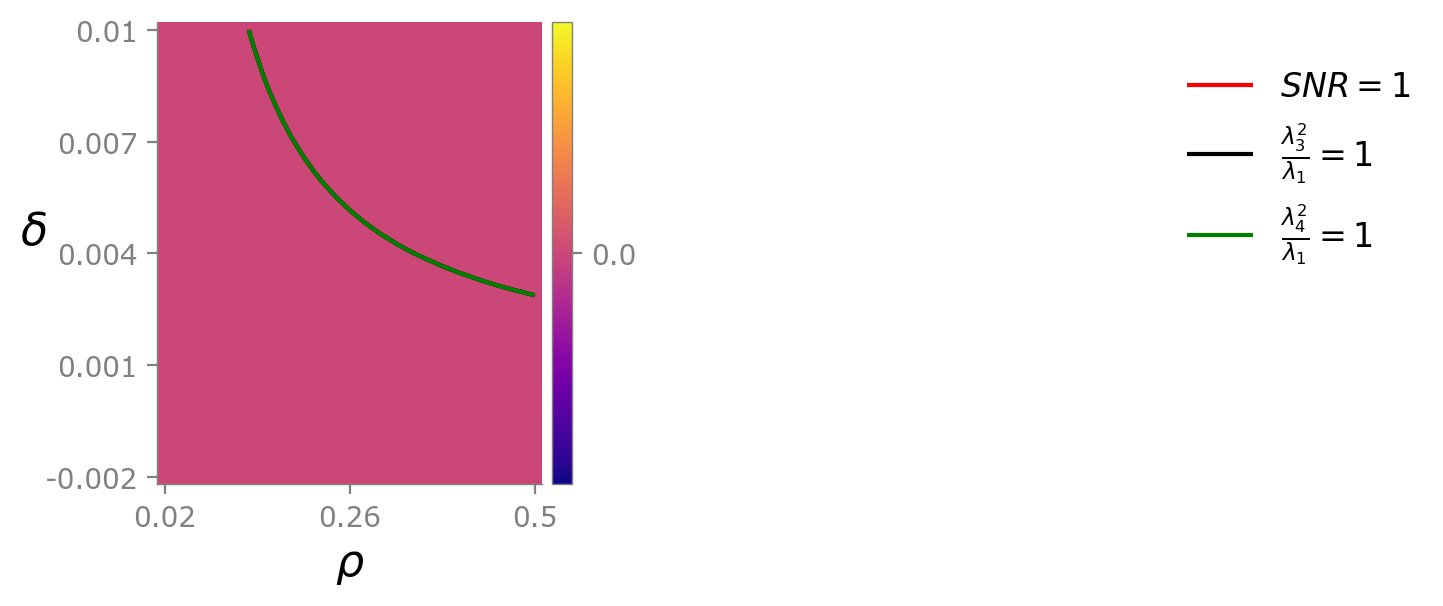

In [6]:
# figsize (width, height) with inch, 1 inch = 72 pt
fig = plt.figure(figsize=(6.2, 3))
widths = [3, 3]
heights = [3]
spec5 = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
zcenter = 0.5
plot_subami = color_imshow_2d(plot_rhos, plot_zs, sub_ami, z_center=zcenter, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap, ax=ax, fig=fig, ytickprecision=3)
# ax.set_xlabel(r'$\rho$', fontsize=20)
handels = []
# handels += contour_data(plot_subami, ax, levels=[1e-3], fmt={1e-3: r'AMI$\simeq$0'}, color='gray', inline=False)
plot_snrm = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 3]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**2/lambdas[:, 0], z_center=1, return_gridz=True)
handels += contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR=1$'}, color='red', inline=False)
handels += contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black', inline=False)
handels += contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green', inline=False)

lgd = fig.legend(handels, [r'$SNR=1$', r'$\frac{\lambda_3^2}{\lambda_1}=1$', r'$\frac{\lambda_4^2}{\lambda_1}=1$'], 
           loc=2, bbox_to_anchor=(0.94, 0.85),  fontsize=12, markerscale=2, frameon=False)


# Second Type show SNR, l3^2/l1, l4^2/l1

In [19]:
# For big n
n = 6000
d = 15
Z_s = 2
Z_b = 2
q = Z_s + Z_b
Withlambda = True
givenNumGroup = False
DC = False
BP = False
learnqby = None
givenTrueEpsilon = False
writeCM = False
additionId = "2ndType"
checkSNR = True
homoDegree = True
fileID = 'amiExp24.5.10' + f'_n={n}_q={q}_d={round(d)}_{"lambda" if Withlambda else ""}_' \
                              f'{"givenNumGroup" if givenNumGroup else ""}_' \
                              f'{"DC" if DC else ""}_{"BP" if BP else ""}_' \
                              f'{"givenTrueEpsilon" if givenTrueEpsilon else ""}_{"writeCM" if writeCM else ""}_{"HomoD" if homoDegree else ""}_' \
                              f'{"CheckSNR" if checkSNR else ""}_' \
                              f'{additionId}'
load_path = "./result/detectabilityWithMeta/" + fileID + ".txt"
plot_rhos, plot_zs, sub_ami, sub_num_group, lambdas = read_exp(load_path=load_path, Withlambda=Withlambda)

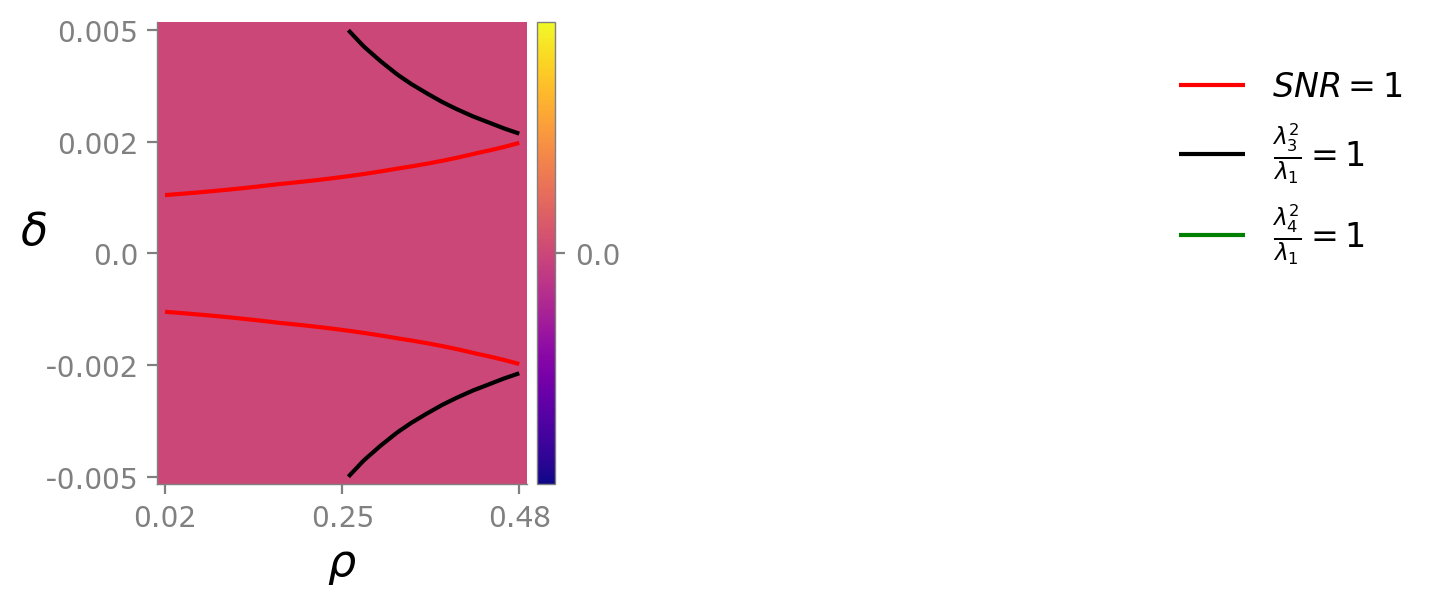

In [20]:
# figsize (width, height) with inch, 1 inch = 72 pt
fig = plt.figure(figsize=(6.2, 3))
widths = [3, 3]
heights = [3]
spec5 = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
zcenter = 0.5
plot_subami = color_imshow_2d(plot_rhos, plot_zs, sub_ami, z_center=zcenter, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap, ax=ax, fig=fig, ytickprecision=3)
# ax.set_xlabel(r'$\rho$', fontsize=20)
handels = []
# handels += contour_data(plot_subami, ax, levels=[1e-3], fmt={1e-3: r'AMI$\simeq$0'}, color='gray', inline=False)
plot_snrm = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 3]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**2/lambdas[:, 0], z_center=1, return_gridz=True)
handels += contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR=1$'}, color='red', inline=False)
handels += contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black', inline=False)
handels += contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green', inline=False)

lgd = fig.legend(handels, [r'$SNR=1$', r'$\frac{\lambda_3^2}{\lambda_1}=1$', r'$\frac{\lambda_4^2}{\lambda_1}=1$'], 
           loc=2, bbox_to_anchor=(0.94, 0.85),  fontsize=12, markerscale=2, frameon=False)


In [52]:
# For big n
n = 6000
d = 5
Z_s = 2
Z_b = 3
q = Z_s + Z_b
Withlambda = True
givenNumGroup = False
DC = False
BP = False
learnqby = None
givenTrueEpsilon = False
writeCM = False
additionId = "2ndType"
checkSNR = False
Type = 2
# fileID = 'amiExp24.5.11' + f'_n={n}_q={q}_d={round(d)}_{"lambda" if Withlambda else ""}_' \
#                               f'{"givenNumGroup" if givenNumGroup else ""}_' \
#                               f'{"DC" if DC else ""}_{"BP" if BP else ""}_' \
#                               f'{"givenTrueEpsilon" if givenTrueEpsilon else ""}_{"writeCM" if writeCM else ""}_' \
#                               f'{"CheckSNR" if checkSNR else ""}_' \
#                               f'{additionId}'
fileID = 'amiExp24.7.7' + f'_n={n}_Zs={Z_s}_Zb={Z_b}_d={round(d)}_{"lambda" if Withlambda else ""}_' \
                              f'{"givenNumGroup" if givenNumGroup else ""}_' \
                              f'{"DC" if DC else ""}_{"BP" if BP else ""}_' \
                              f'{"givenTrueEpsilon" if givenTrueEpsilon else ""}_{"writeCM" if writeCM else ""}_' \
                              f'{"CheckSNR" if checkSNR else ""}_' \
                              f'{additionId}'
load_path = "./result/detectabilityWithMeta/" + fileID + ".txt"
exclude_rho = [0.4, 0.42, 0.44, 0.46, 0.48]
exclude_z = [0.00366, 0.00381, 0.00395, 0.0041]
plot_rhos, plot_zs, sub_ami, sub_num_group, lambdas = read_exp(load_path=load_path, Withlambda=Withlambda, exclude_rho=exclude_rho, exclude_z=exclude_z)
print(np.unique(plot_rhos))
print(np.min(sub_ami))

[0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26 0.28
 0.3  0.32 0.34 0.36 0.38]
-1.0


minz=0, maxz=0.8959130000000002, cticks=[0. 1.], clabel=['0.0', '1.0']
minz=1, maxz=5, cticks=[0.   0.25 0.5  0.75 1.  ], clabel=['1.0', '2.0', '3.0', '4.0', '5.0']


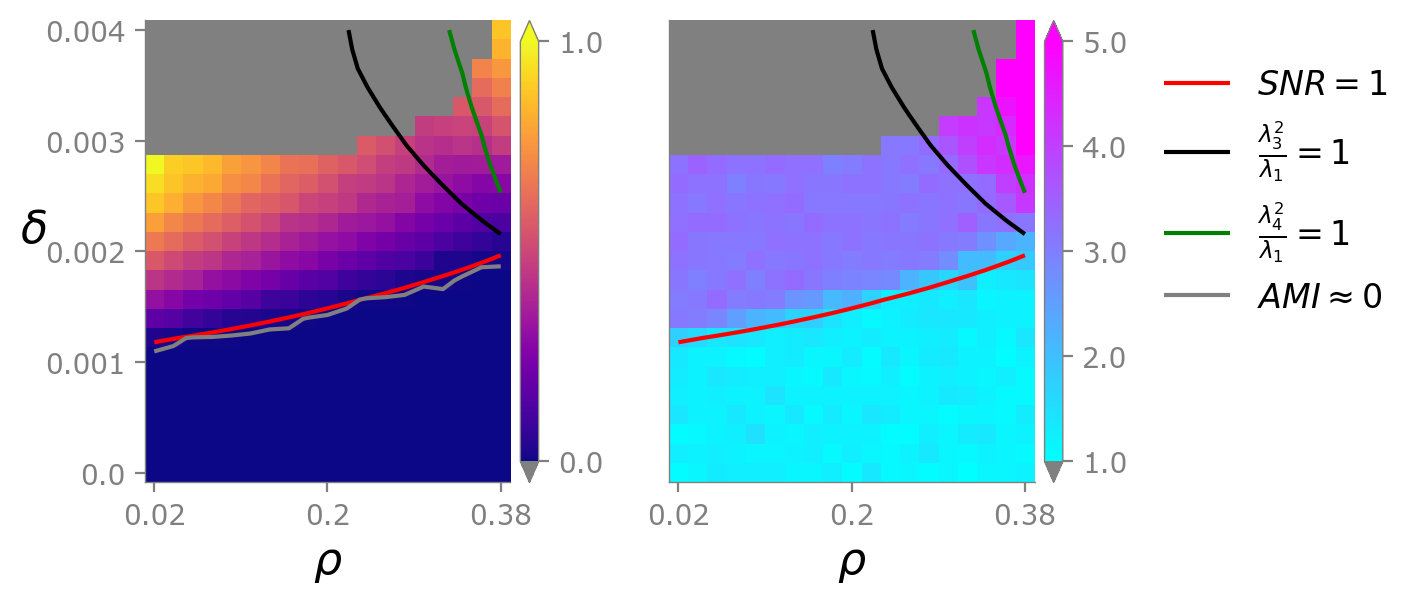

In [63]:
# figsize (width, height) with inch, 1 inch = 72 pt
fig = plt.figure(figsize=(6.2, 3))
widths = [3, 3]
heights = [3]
spec5 = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
cmap.set_extremes(under='gray')
zcenter = 0.5
plot_subami = color_imshow_2d(plot_rhos, plot_zs, sub_ami, z_center=zcenter, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', 
                              min_z=0, cmap=cmap, 
                              ax=ax, fig=fig, vmin=0, ytickprecision=3)
# ax.set_xlabel(r'$\rho$', fontsize=20)
handels = []
plot_snrm = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 3]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**2/lambdas[:, 0], z_center=1, return_gridz=True)
handels += contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR=1$'}, color='red', inline=False)
handels += contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black', inline=False)
handels += contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green', inline=False)

contour_subami = color_imshow_2d(plot_rhos, plot_zs, sub_ami, z_center=zcenter, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', 
                              cmap=cmap, 
                              ax=ax, fig=fig, return_gridz=True, ytickprecision=3)
x = plot_rhos
y = plot_zs
z = sub_ami
_x = np.sort(np.unique(x))
_y = np.sort(np.unique(y))
for i, zi in enumerate(z):
    if z[i] == -1:
        i_x = np.where(_x == x[i])[0]
        i_y = np.where(_y == y[i])[0]
#         ax.add_patch(mpl.patches.Rectangle((i_x-.5, i_y-.5), 1, 1, hatch='///////', fill=True, snap=False, color="gray", zorder=2))
        contour_subami[i_y, i_x] = 1
handels += contour_data(contour_subami, ax, levels=[1e-2], fmt={1e-2: r'AMI$\simeq$0'}, color='gray', inline=False)


row = 0
col = 1
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["cool"]
cmap.set_extremes(under='gray')
zcenter = 3
plot_subnumgroup = color_imshow_2d(plot_rhos, plot_zs, sub_num_group, z_center=zcenter, title="", xlabel=r'$\rho$', ylabel=r'',
                                   min_z=1, max_z=5, cmap=cmap,
                                   ax=ax, fig=fig, set_yticks=False, vmin=1, vmax=5, ytickprecision=3)
# ax.set_xlabel(r'$\rho$', fontsize=20)
plot_snrm = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 3]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**2/lambdas[:, 0], z_center=1, return_gridz=True)
contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR=1$'}, color='red', inline=False)
contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black', inline=False)
contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green', inline=False)
for i, zi in enumerate(z):
    if z[i] == -1:
        i_x = np.where(_x == x[i])[0]
        i_y = np.where(_y == y[i])[0]
#         ax.add_patch(mpl.patches.Rectangle((i_x-.5, i_y-.5), 1, 1, hatch='///////', fill=True, snap=False, color="gray", zorder=2))

lgd = fig.legend(handels, [r'$SNR=1$', r'$\frac{\lambda_3^2}{\lambda_1}=1$', r'$\frac{\lambda_4^2}{\lambda_1}=1$', r'$AMI\approx 0$'], 
           loc=2, bbox_to_anchor=(0.94, 0.85),  fontsize=12, markerscale=2, frameon=False)
save_path = "./_Figure/Minority/" + "FigureMinorityAMISNR_BH_samed" + f'd{d}Z_s{Z_s}Z_b{Z_b}' + "_v1.pdf"
# plt.tight_layout()
plt.savefig(save_path, dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

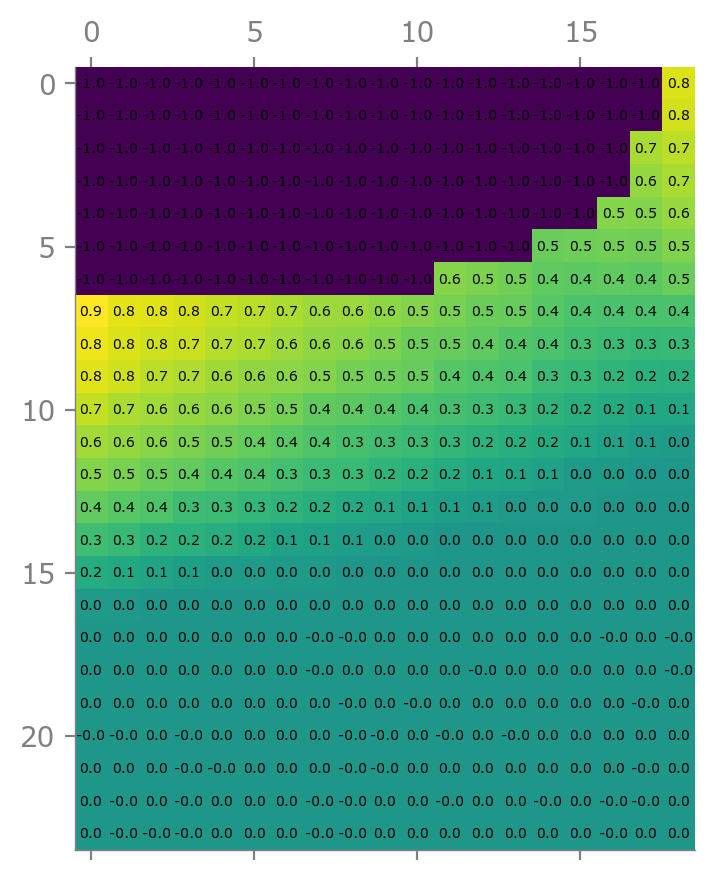

In [60]:
show_ami = np.flip(plot_subami, axis=0)
plt.matshow(show_ami)
shape = np.shape(show_ami)
for i in range(shape[0]):
        for j in range(shape[1]):
            c = show_ami[i,j]
#             print(i, j, c)
            plt.text(j, i, str(round(c, 1)), va='center', ha='center', fontsize=5)

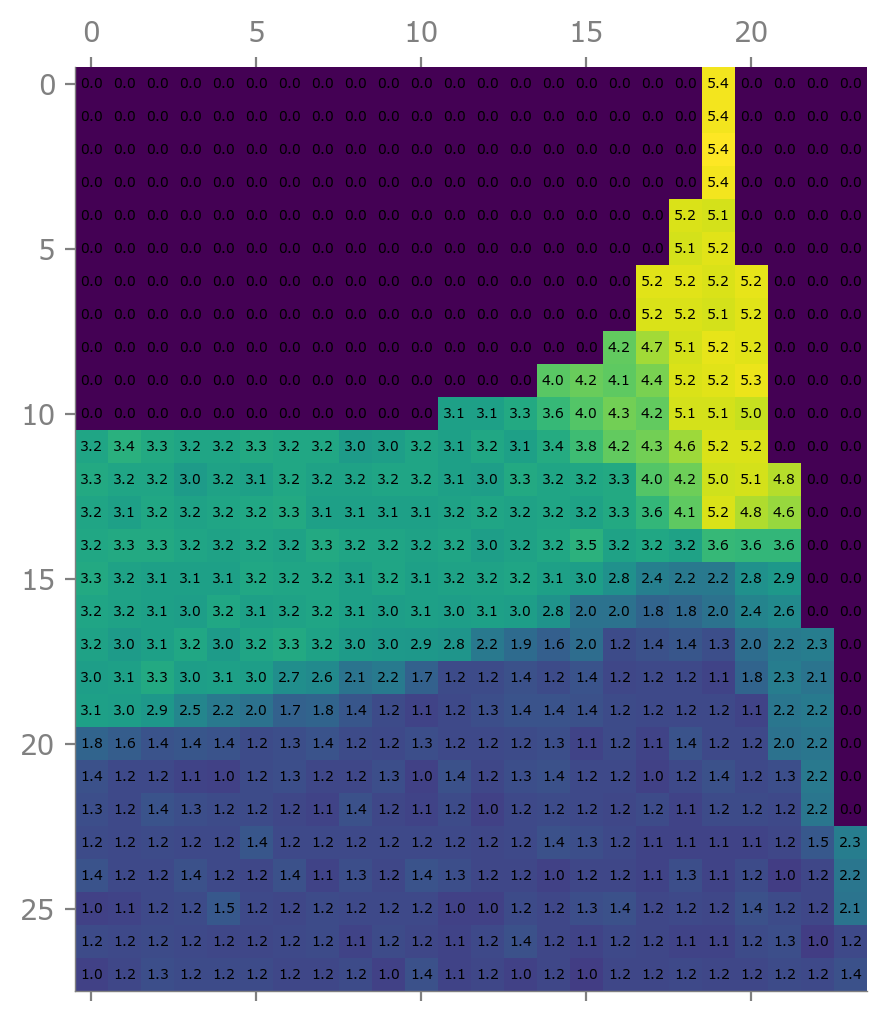

In [17]:
fig = plt.figure(figsize=(6, 6))
widths = [3]
heights = [3]
spec5 = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
show_num_group = np.flip(plot_subnumgroup, axis=0)
ax.matshow(show_num_group)
shape = np.shape(show_num_group)
for i in range(shape[0]):
        for j in range(shape[1]):
            c = show_num_group[i,j]
#             print(i, j, c)
            ax.text(j, i, str(np.round(c, 1)), va='center', ha='center', fontsize=5)

In [29]:
print(np.unique(sub_num_group))

[0. 1. 2. 3. 4. 5. 6.]


In [37]:
# For big n
n = 6000
d = 5
Z_s = 2
Z_b = 2
q = Z_s + Z_b
Withlambda = True
givenNumGroup = False
DC = False
BP = False
learnqby = None
givenTrueEpsilon = False
writeCM = False
additionId = "2ndType"
checkSNR = False
Type = 2
fileID = 'amiExp24.5.11' + f'_n={n}_q={q}_d={round(d)}_{"lambda" if Withlambda else ""}_' \
                              f'{"givenNumGroup" if givenNumGroup else ""}_' \
                              f'{"DC" if DC else ""}_{"BP" if BP else ""}_' \
                              f'{"givenTrueEpsilon" if givenTrueEpsilon else ""}_{"writeCM" if writeCM else ""}_' \
                              f'{"CheckSNR" if checkSNR else ""}_' \
                              f'{additionId}'
load_path = "./result/detectabilityWithMeta/" + fileID + ".txt"
plot_rhos, plot_zs, sub_ami, sub_num_group, lambdas = read_exp(load_path=load_path, Withlambda=Withlambda)

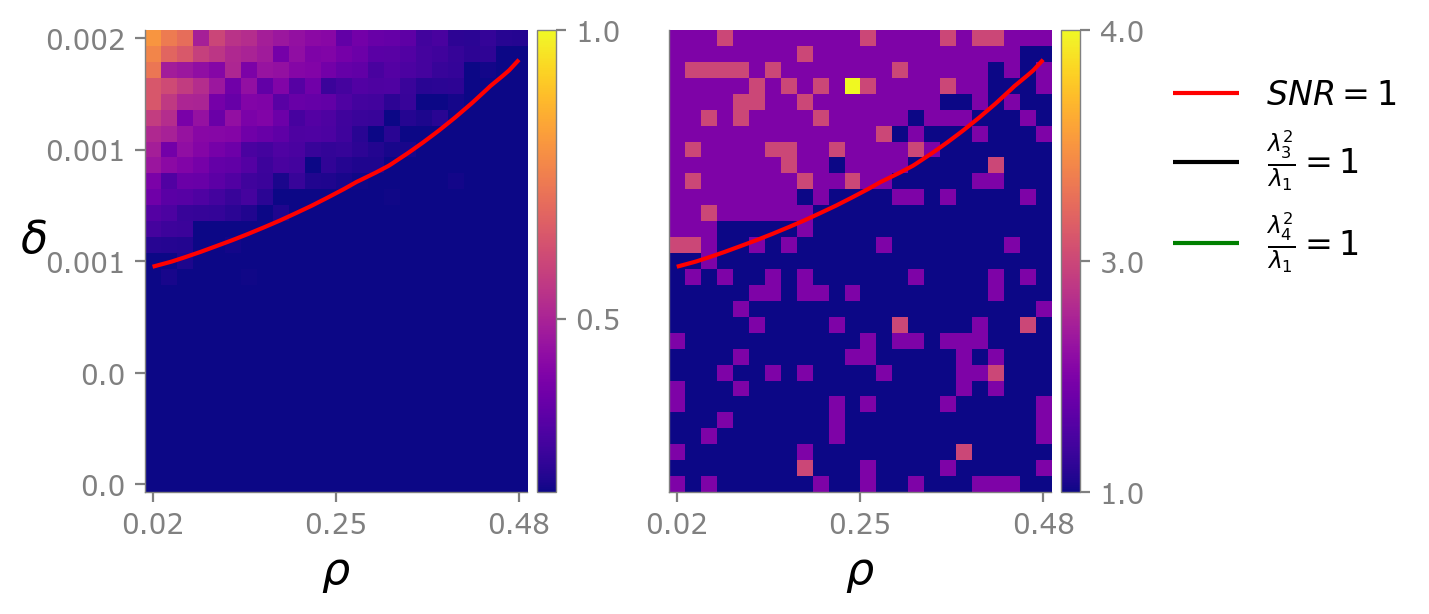

In [38]:
# figsize (width, height) with inch, 1 inch = 72 pt
fig = plt.figure(figsize=(6.2, 3))
widths = [3, 3]
heights = [3]
spec5 = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
zcenter = 0.5
plot_subami = color_imshow_2d(plot_rhos, plot_zs, sub_ami, z_center=zcenter, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap, 
                              ax=ax, fig=fig, vmin=0, vmax=1, ytickprecision=3)
# ax.set_xlabel(r'$\rho$', fontsize=20)
handels = []
# handels += contour_data(plot_subami, ax, levels=[1e-3], fmt={1e-3: r'AMI$\simeq$0'}, color='gray', inline=False)
plot_snrm = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 3]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**2/lambdas[:, 0], z_center=1, return_gridz=True)
handels += contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR=1$'}, color='red', inline=False)
handels += contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black', inline=False)
handels += contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green', inline=False)

x = plot_rhos
y = plot_zs
z = sub_ami
_x = np.sort(np.unique(x))
_y = np.sort(np.unique(y))
for i, zi in enumerate(z):
    if z[i] == -1:
        i_x = np.where(_x == x[i])[0]
        i_y = np.where(_y == y[i])[0]
        ax.add_patch(mpl.patches.Rectangle((i_x-.5, i_y-.5), 1, 1, hatch='///////', fill=True, snap=False, color="gray", zorder=2))

row = 0
col = 1
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
zcenter = 3
plot_subnumgroup = color_imshow_2d(plot_rhos, plot_zs, sub_num_group, z_center=zcenter, title="", xlabel=r'$\rho$', ylabel=r'', cmap=cmap,
                                   ax=ax, fig=fig, set_yticks=False,  vmin=1, ytickprecision=3)
# ax.set_xlabel(r'$\rho$', fontsize=20)
plot_snrm = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 3]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**2/lambdas[:, 0], z_center=1, return_gridz=True)
contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR=1$'}, color='red', inline=False)
contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black', inline=False)
contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green', inline=False)
for i, zi in enumerate(z):
    if z[i] == -1:
        i_x = np.where(_x == x[i])[0]
        i_y = np.where(_y == y[i])[0]
        ax.add_patch(mpl.patches.Rectangle((i_x-.5, i_y-.5), 1, 1, hatch='///////', fill=True, snap=False, color="gray", zorder=2))

lgd = fig.legend(handels, [r'$SNR=1$', r'$\frac{\lambda_3^2}{\lambda_1}=1$', r'$\frac{\lambda_4^2}{\lambda_1}=1$'], 
           loc=2, bbox_to_anchor=(0.94, 0.85),  fontsize=12, markerscale=2, frameon=False)


In [4]:
# For big n
n = 14000
d = 5
Z_s = 3
Z_b = 4
q = Z_s + Z_b
Withlambda = True
givenNumGroup = False
DC = False
BP = False
learnqby = None
givenTrueEpsilon = False
writeCM = False
additionId = "2ndType"
checkSNR = True
Type = 2
fileID = 'amiExp24.5.13' + f'_n={n}_Zs={Z_s}_Zb={Z_b}_d={round(d)}_{"lambda" if Withlambda else ""}_' \
                              f'{"givenNumGroup" if givenNumGroup else ""}_' \
                              f'{"DC" if DC else ""}_{"BP" if BP else ""}_' \
                              f'{"givenTrueEpsilon" if givenTrueEpsilon else ""}_{"writeCM" if writeCM else ""}_' \
                              f'{"CheckSNR" if checkSNR else ""}_' \
                              f'{additionId}'
load_path = "./result/detectabilityWithMeta/" + fileID + ".txt"
plot_rhos, plot_zs, sub_ami, sub_num_group, lambdas = read_exp(load_path=load_path, Withlambda=Withlambda)

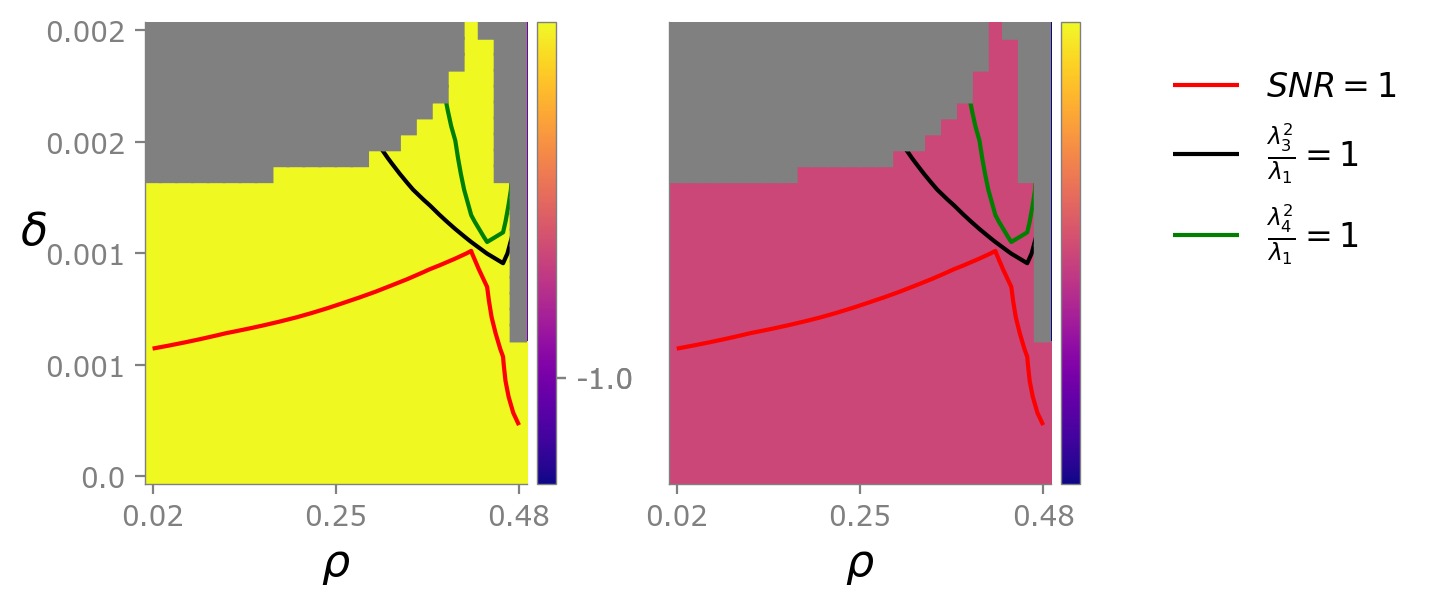

In [5]:
# figsize (width, height) with inch, 1 inch = 72 pt
fig = plt.figure(figsize=(6.2, 3))
widths = [3, 3]
heights = [3]
spec5 = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
zcenter = 0.5
plot_subami = color_imshow_2d(plot_rhos, plot_zs, sub_ami, z_center=zcenter, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap, 
                              ax=ax, fig=fig, vmin=0, vmax=1, ytickprecision=3)
# ax.set_xlabel(r'$\rho$', fontsize=20)
handels = []
# handels += contour_data(plot_subami, ax, levels=[1e-3], fmt={1e-3: r'AMI$\simeq$0'}, color='gray', inline=False)
plot_snrm = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 3]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**2/lambdas[:, 0], z_center=1, return_gridz=True)
handels += contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR=1$'}, color='red', inline=False)
handels += contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black', inline=False)
handels += contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green', inline=False)

x = plot_rhos
y = plot_zs
z = sub_ami
_x = np.sort(np.unique(x))
_y = np.sort(np.unique(y))
for i, zi in enumerate(z):
    if z[i] == -1:
        i_x = np.where(_x == x[i])[0]
        i_y = np.where(_y == y[i])[0]
        ax.add_patch(mpl.patches.Rectangle((i_x-.5, i_y-.5), 1, 1, hatch='///////', fill=True, snap=False, color="gray", zorder=2))

row = 0
col = 1
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
zcenter = 3
plot_subnumgroup = color_imshow_2d(plot_rhos, plot_zs, sub_num_group, z_center=zcenter, title="", xlabel=r'$\rho$', ylabel=r'', cmap=cmap,
                                   ax=ax, fig=fig, set_yticks=False,  vmin=1, ytickprecision=3)
# ax.set_xlabel(r'$\rho$', fontsize=20)
plot_snrm = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 3]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**2/lambdas[:, 0], z_center=1, return_gridz=True)
contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR=1$'}, color='red', inline=False)
contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black', inline=False)
contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green', inline=False)
for i, zi in enumerate(z):
    if z[i] == -1:
        i_x = np.where(_x == x[i])[0]
        i_y = np.where(_y == y[i])[0]
        ax.add_patch(mpl.patches.Rectangle((i_x-.5, i_y-.5), 1, 1, hatch='///////', fill=True, snap=False, color="gray", zorder=2))

lgd = fig.legend(handels, [r'$SNR=1$', r'$\frac{\lambda_3^2}{\lambda_1}=1$', r'$\frac{\lambda_4^2}{\lambda_1}=1$'], 
           loc=2, bbox_to_anchor=(0.94, 0.85),  fontsize=12, markerscale=2, frameon=False)


In [6]:
# For big n
n = 6000
d = 5
Z_s = 2
Z_b = 3
q = Z_s + Z_b
Withlambda = True
givenNumGroup = False
DC = False
BP = False
learnqby = None
givenTrueEpsilon = False
writeCM = False
additionId = "2ndType"
checkSNR = False
Type = 2
fileID = 'amiExp24.5.14' + f'_n={n}_Zs={Z_s}_Zb={Z_b}_d={round(d)}_{"lambda" if Withlambda else ""}_' \
                              f'{"givenNumGroup" if givenNumGroup else ""}_' \
                              f'{"DC" if DC else ""}_{"BP" if BP else ""}_' \
                              f'{"givenTrueEpsilon" if givenTrueEpsilon else ""}_{"writeCM" if writeCM else ""}_' \
                              f'{"CheckSNR" if checkSNR else ""}_' \
                              f'{additionId}'
load_path = "./result/detectabilityWithMeta/" + fileID + ".txt"
plot_rhos, plot_zs, sub_ami, sub_num_group, lambdas = read_exp(load_path=load_path, Withlambda=Withlambda)

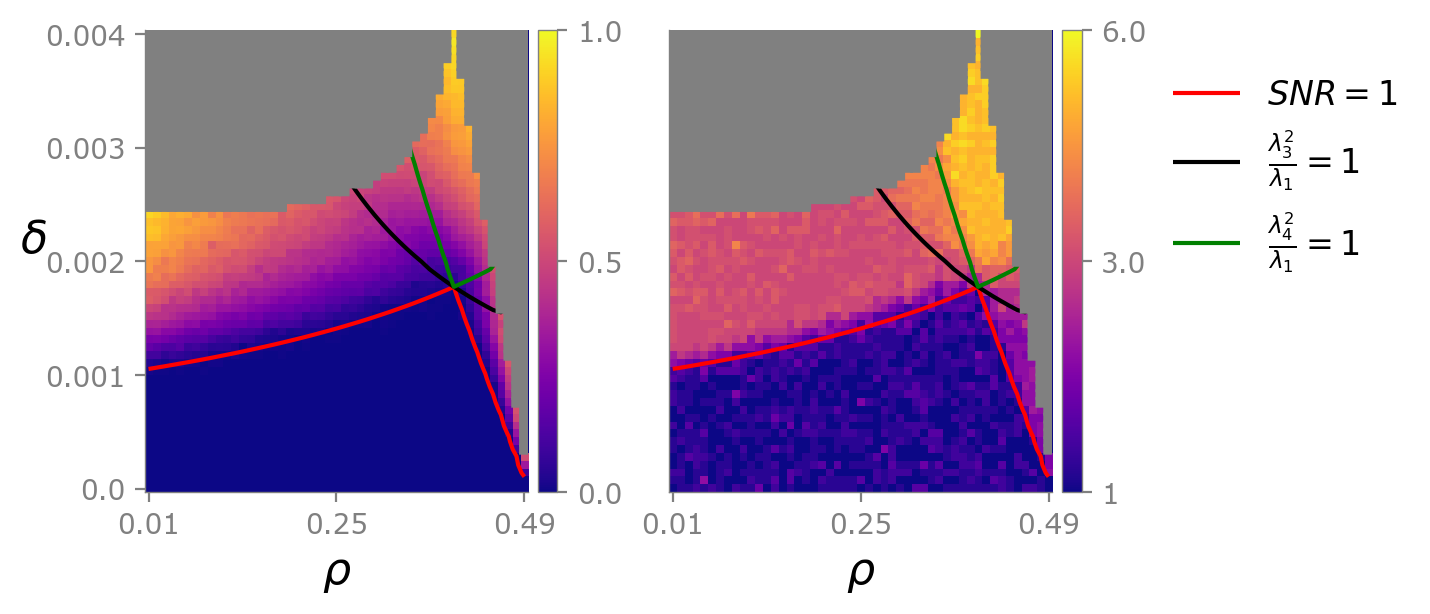

In [12]:
# figsize (width, height) with inch, 1 inch = 72 pt
fig = plt.figure(figsize=(6.2, 3))
widths = [3, 3]
heights = [3]
spec5 = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
zcenter = 0.5
plot_subami = color_imshow_2d(plot_rhos, plot_zs, sub_ami, z_center=zcenter, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', min_z=0, max_z=1, 
                              cmap=cmap, ax=ax, fig=fig, vmin=0, vmax=1, ytickprecision=3)
# ax.set_xlabel(r'$\rho$', fontsize=20)
handels = []
# handels += contour_data(plot_subami, ax, levels=[1e-3], fmt={1e-3: r'AMI$\simeq$0'}, color='gray', inline=False)
plot_snrm = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 3]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**2/lambdas[:, 0], z_center=1, return_gridz=True)
handels += contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR=1$'}, color='red', inline=False)
handels += contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black', inline=False)
handels += contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green', inline=False)

x = plot_rhos
y = plot_zs
z = sub_ami
_x = np.sort(np.unique(x))
_y = np.sort(np.unique(y))
for i, zi in enumerate(z):
    if z[i] == -1:
        i_x = np.where(_x == x[i])[0]
        i_y = np.where(_y == y[i])[0]
        ax.add_patch(mpl.patches.Rectangle((i_x-.5, i_y-.5), 1, 1, hatch='///////', fill=True, snap=False, color="gray", zorder=2))

row = 0
col = 1
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
zcenter = 3
plot_subnumgroup = color_imshow_2d(plot_rhos, plot_zs, sub_num_group, z_center=zcenter, title="", xlabel=r'$\rho$', ylabel=r'', min_z=1,
                                   cmap=cmap, ax=ax, fig=fig, set_yticks=False, vmin=1, ytickprecision=3)
# ax.set_xlabel(r'$\rho$', fontsize=20)
plot_snrm = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 3]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**2/lambdas[:, 0], z_center=1, return_gridz=True)
contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR=1$'}, color='red', inline=False)
contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black', inline=False)
contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green', inline=False)
for i, zi in enumerate(z):
    if z[i] == -1:
        i_x = np.where(_x == x[i])[0]
        i_y = np.where(_y == y[i])[0]
        ax.add_patch(mpl.patches.Rectangle((i_x-.5, i_y-.5), 1, 1, hatch='///////', fill=True, snap=False, color="gray", zorder=2))

lgd = fig.legend(handels, [r'$SNR=1$', r'$\frac{\lambda_3^2}{\lambda_1}=1$', r'$\frac{\lambda_4^2}{\lambda_1}=1$'], 
           loc=2, bbox_to_anchor=(0.94, 0.85),  fontsize=12, markerscale=2, frameon=False)


In [4]:
# For big n
n = 6000
d = 5
Z_s = 2
Z_b = 3
q = Z_s + Z_b
Withlambda = True
givenNumGroup = False
DC = False
BP = True
learnqby = None
givenTrueEpsilon = False
writeCM = False
additionId = "2ndType"
checkSNR = False
Type = 2
fileID = 'amiExp24.5.14' + f'_n={n}_Zs={Z_s}_Zb={Z_b}_d={round(d)}_{"lambda" if Withlambda else ""}_' \
                              f'{"givenNumGroup" if givenNumGroup else ""}_' \
                              f'{"DC" if DC else ""}_{"BP" if BP else ""}_' \
                              f'{"givenTrueEpsilon" if givenTrueEpsilon else ""}_{"writeCM" if writeCM else ""}_' \
                              f'{"CheckSNR" if checkSNR else ""}_' \
                              f'{additionId}'
load_path = "./result/detectabilityWithMeta/" + fileID + ".txt"
plot_rhos, plot_zs, sub_ami_1, sub_num_group, lambdas = read_exp(load_path=load_path, Withlambda=Withlambda)
print(np.unique(plot_rhos))

[0.02 0.04 0.07 0.09 0.11 0.13 0.15 0.17 0.2  0.22 0.24 0.26 0.28 0.3
 0.33 0.35 0.37 0.39 0.41 0.43 0.46 0.48]


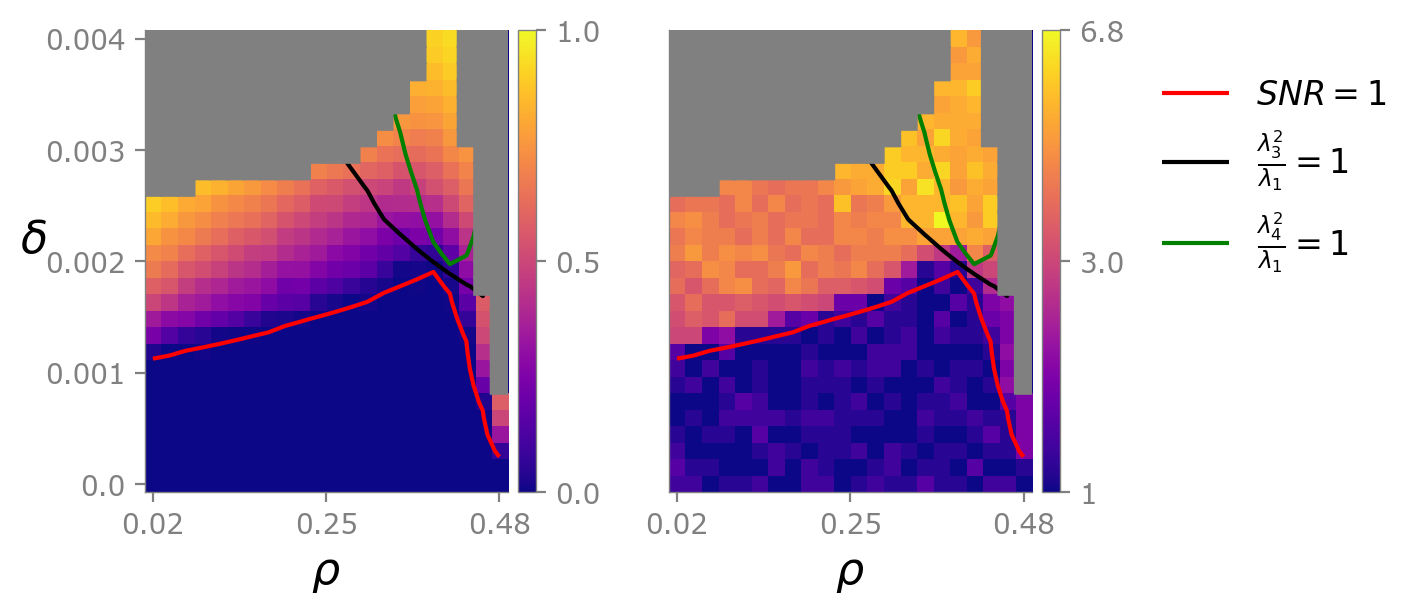

In [5]:
# figsize (width, height) with inch, 1 inch = 72 pt
fig = plt.figure(figsize=(6.2, 3))
widths = [3, 3]
heights = [3]
spec5 = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
zcenter = 0.5
plot_subami = color_imshow_2d(plot_rhos, plot_zs, sub_ami_1, z_center=zcenter, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', min_z=0, max_z=1, 
                              cmap=cmap, ax=ax, fig=fig, vmin=0, vmax=1, ytickprecision=3)
# ax.set_xlabel(r'$\rho$', fontsize=20)
handels = []
# handels += contour_data(plot_subami, ax, levels=[1e-3], fmt={1e-3: r'AMI$\simeq$0'}, color='gray', inline=False)
plot_snrm = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 3]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**2/lambdas[:, 0], z_center=1, return_gridz=True)
handels += contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR=1$'}, color='red', inline=False)
handels += contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black', inline=False)
handels += contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green', inline=False)

x = plot_rhos
y = plot_zs
z = sub_ami_1
_x = np.sort(np.unique(x))
_y = np.sort(np.unique(y))
for i, zi in enumerate(z):
    if z[i] == -1:
        i_x = np.where(_x == x[i])[0]
        i_y = np.where(_y == y[i])[0]
        ax.add_patch(mpl.patches.Rectangle((i_x-.5, i_y-.5), 1, 1, hatch='///////', fill=True, snap=False, color="gray", zorder=2))

row = 0
col = 1
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
zcenter = 3
plot_subnumgroup = color_imshow_2d(plot_rhos, plot_zs, sub_num_group, z_center=zcenter, title="", xlabel=r'$\rho$', ylabel=r'', min_z=1,
                                   cmap=cmap, ax=ax, fig=fig, set_yticks=False, vmin=1, ytickprecision=3)
# ax.set_xlabel(r'$\rho$', fontsize=20)
plot_snrm = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 3]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**2/lambdas[:, 0], z_center=1, return_gridz=True)
contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR=1$'}, color='red', inline=False)
contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black', inline=False)
contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green', inline=False)
for i, zi in enumerate(z):
    if z[i] == -1:
        i_x = np.where(_x == x[i])[0]
        i_y = np.where(_y == y[i])[0]
        ax.add_patch(mpl.patches.Rectangle((i_x-.5, i_y-.5), 1, 1, hatch='///////', fill=True, snap=False, color="gray", zorder=2))

lgd = fig.legend(handels, [r'$SNR=1$', r'$\frac{\lambda_3^2}{\lambda_1}=1$', r'$\frac{\lambda_4^2}{\lambda_1}=1$'], 
           loc=2, bbox_to_anchor=(0.94, 0.85),  fontsize=12, markerscale=2, frameon=False)


In [11]:
rhos = np.unique(plot_rhos)
deltas = np.unique(plot_zs)
print(f'rhos={rhos},\ndeltas={deltas}')
# index = np.argwhere(np.logical_and(plot_rhos == 0.24, plot_zs == 0.00225)) # 4.6
index = np.argwhere(np.logical_and(plot_rhos == 0.48, plot_zs == 0.00053)) # 2.0
index = np.argwhere(np.logical_and(plot_rhos == 0.46, plot_zs == 0.00092)) # 2.2
print(sub_num_group[index[0][0]])

rhos=[0.02 0.04 0.07 0.09 0.11 0.13 0.15 0.17 0.2  0.22 0.24 0.26 0.28 0.3
 0.33 0.35 0.37 0.39 0.41 0.43 0.46 0.48],
deltas=[0.00013 0.00026 0.0004  0.00053 0.00066 0.00079 0.00092 0.00106 0.00119
 0.00132 0.00145 0.00159 0.00172 0.00185 0.00198 0.00211 0.00225 0.00238
 0.00251 0.00264 0.00278 0.00291 0.00304 0.00317 0.0033  0.00344 0.00357
 0.0037 ]
2.2


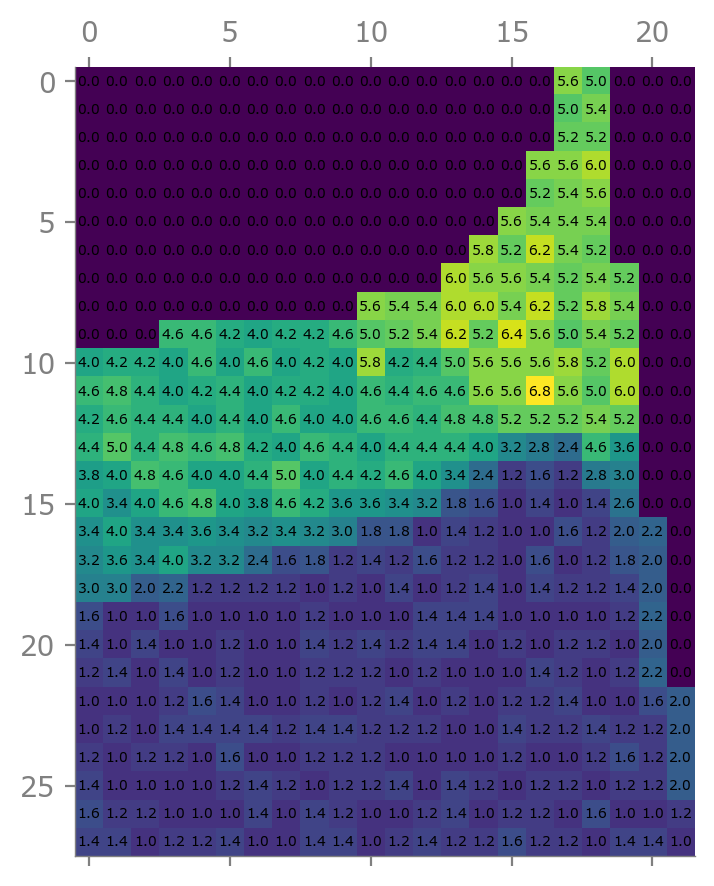

In [26]:
show_num_group = np.flip(plot_subnumgroup, axis=0)
plt.matshow(show_num_group)
shape = np.shape(show_num_group)
for i in range(shape[0]):
        for j in range(shape[1]):
            c = show_num_group[i,j]
#             print(i, j, c)
            plt.text(j, i, str(c), va='center', ha='center', fontsize=5)

# 1.See free energy change for 1 column
# 2.show confusion matrix for different phase
# 3. run more.

In [4]:
np.setdiff1d(np.around(np.linspace(0, 0.5, 24), 2), np.array([0, 0.5]))

array([0.02, 0.04, 0.07, 0.09, 0.11, 0.13, 0.15, 0.17, 0.2 , 0.22, 0.24,
       0.26, 0.28, 0.3 , 0.33, 0.35, 0.37, 0.39, 0.41, 0.43, 0.46, 0.48])

In [28]:
# For big n
n = 6000
d = 5
Z_s = 2
Z_b = 3
q = Z_s + Z_b
Withlambda = True
givenNumGroup = False
DC = False
BP = True
learnqby = None
givenTrueEpsilon = False
writeCM = False
additionId = "2ndType_3or2decimal"
checkSNR = False
Type = 2
fileID = 'amiExp24.6.1' + f'_n={n}_Zs={Z_s}_Zb={Z_b}_d={round(d)}_{"lambda" if Withlambda else ""}_' \
                              f'{"givenNumGroup" if givenNumGroup else ""}_' \
                              f'{"DC" if DC else ""}_{"BP" if BP else ""}_' \
                              f'{"givenTrueEpsilon" if givenTrueEpsilon else ""}_{"writeCM" if writeCM else ""}_' \
                              f'{"CheckSNR" if checkSNR else ""}_' \
                              f'{additionId}'
load_path = "./result/detectabilityWithMeta/" + fileID + ".txt"

add_additionId = "2ndType_3or2decimal_10more"
add_fileId = 'amiExp24.6.3' + f'_n={n}_Zs={Z_s}_Zb={Z_b}_d={round(d)}_{"lambda" if Withlambda else ""}_' \
                              f'{"givenNumGroup" if givenNumGroup else ""}_' \
                              f'{"DC" if DC else ""}_{"BP" if BP else ""}_' \
                              f'{"givenTrueEpsilon" if givenTrueEpsilon else ""}_{"writeCM" if writeCM else ""}_' \
                              f'{"CheckSNR" if checkSNR else ""}_' \
                              f'{add_additionId}'
add_loadpath = ["./result/detectabilityWithMeta/" + add_fileId + ".txt"]
exclude_rho = [0.4, 0.42, 0.44, 0.46, 0.48]
exclude_z = [0.00366, 0.00381, 0.00395, 0.0041]
plot_rhos, plot_zs, sub_ami, sub_num_group, lambdas = read_exp(load_path=load_path, Withlambda=Withlambda, add_paths=add_loadpath, exclude_rho=exclude_rho, exclude_z=exclude_z)
print(np.unique(plot_rhos), np.unique(plot_zs), np.size(plot_zs))

Additional result adding...
[0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26 0.28
 0.3  0.32 0.34 0.36 0.38] [0.00015 0.00029 0.00044 0.00059 0.00073 0.00088 0.00103 0.00117 0.00132
 0.00146 0.00161 0.00176 0.0019  0.00205 0.0022  0.00234 0.00249 0.00264
 0.00278 0.00293 0.00308 0.00322 0.00337 0.00351] 456


minz=0, maxz=0.9376330000000002, cticks=[0. 1.], clabel=['0.0', '1.0']
minz=1, maxz=5.15, cticks=[0.         0.24127907 0.48255814 0.72383721 0.96511628], clabel=['1.0', '2.0', '3.0', '4.0', '5.0']


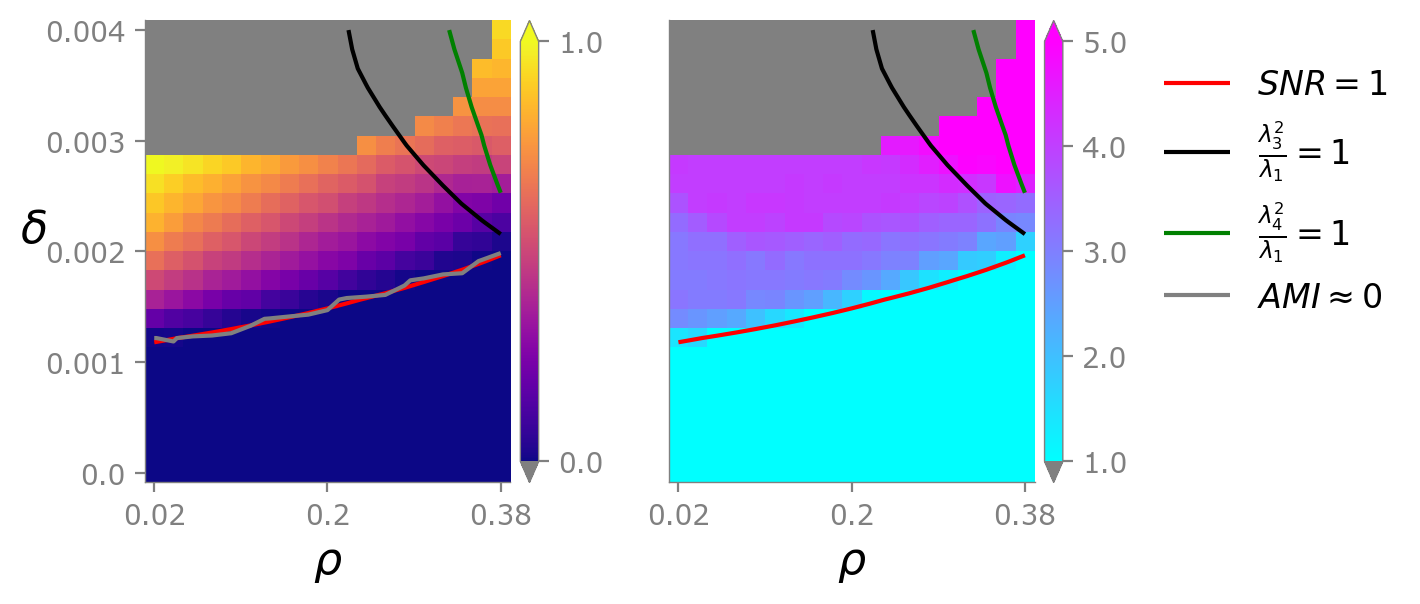

In [47]:
# figsize (width, height) with inch, 1 inch = 72 pt
fig = plt.figure(figsize=(6.2, 3))
widths = [3, 3]
heights = [3]
spec5 = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
cmap.set_extremes(under='gray')
zcenter = 0.5
plot_subami = color_imshow_2d(plot_rhos, plot_zs, sub_ami, z_center=zcenter, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', 
                              min_z=0, cmap=cmap, 
                              ax=ax, fig=fig, vmin=0, ytickprecision=3)
# ax.set_xlabel(r'$\rho$', fontsize=20)
handels = []
# handels += contour_data(plot_subami, ax, levels=[1e-3], fmt={1e-3: r'AMI$\simeq$0'}, color='gray', inline=False)
plot_snrm = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 3]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**2/lambdas[:, 0], z_center=1, return_gridz=True)
handels += contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR=1$'}, color='red', inline=False)
handels += contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black', inline=False)
handels += contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green', inline=False)

contour_subami = color_imshow_2d(plot_rhos, plot_zs, sub_ami, z_center=zcenter, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', 
                              cmap=cmap, 
                              ax=ax, fig=fig, return_gridz=True, vmin=0, vmax=1, ytickprecision=3)
x = plot_rhos
y = plot_zs
z = sub_ami
_x = np.sort(np.unique(x))
_y = np.sort(np.unique(y))
for i, zi in enumerate(z):
    if z[i] == -1:
        i_x = np.where(_x == x[i])[0]
        i_y = np.where(_y == y[i])[0]
#         ax.add_patch(mpl.patches.Rectangle((i_x-.5, i_y-.5), 1, 1, hatch='///////', fill=True, snap=False, color="gray", zorder=2))
        contour_subami[i_y, i_x] = 1
handels += contour_data(contour_subami, ax, levels=[1e-2], fmt={1e-2: r'AMI$\simeq$0'}, color='gray', inline=False)
        
row = 0
col = 1
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["cool"]
cmap.set_extremes(under='gray')
zcenter = 3
plot_subnumgroup = color_imshow_2d(plot_rhos, plot_zs, sub_num_group, z_center=zcenter, title="", xlabel=r'$\rho$', ylabel=r'',
                                   min_z=1, cmap=cmap, 
                                   ax=ax, fig=fig, set_yticks=False, vmin=1, vmax=5, ytickprecision=3)
# ax.set_xlabel(r'$\rho$', fontsize=20)
plot_snrm = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 3]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**2/lambdas[:, 0], z_center=1, return_gridz=True)
contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR=1$'}, color='red', inline=False)
contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black', inline=False)
contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green', inline=False)

# contour_data(color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**(3/2)*abs(lambdas[:, 2])**(1/2)/lambdas[:, 0], z_center=1, return_gridz=True),
#              ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='yellow', inline=False)

# contour_data(color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**(3/2)*abs(lambdas[:, 3])**(1/2)/lambdas[:, 0], z_center=1, return_gridz=True),
#              ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='blue', inline=False)
# for i, zi in enumerate(z):
#     if z[i] == -1:
#         i_x = np.where(_x == x[i])[0]
#         i_y = np.where(_y == y[i])[0]
#         ax.add_patch(mpl.patches.Rectangle((i_x-.5, i_y-.5), 1, 1, hatch='///////', fill=True, snap=False, color="gray", zorder=2))

lgd = fig.legend(handels, [r'$SNR=1$', r'$\frac{\lambda_3^2}{\lambda_1}=1$', r'$\frac{\lambda_4^2}{\lambda_1}=1$', r'$AMI\approx0$'], 
           loc=2, bbox_to_anchor=(0.94, 0.85),  fontsize=12, markerscale=2, frameon=False)
save_path = "./_Figure/Minority/" + "FigureMinorityAMISNR_BP_samed" + f'd{d}Z_s{Z_s}Z_b{Z_b}' + "_v1.pdf"
# plt.tight_layout()
plt.savefig(save_path, dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

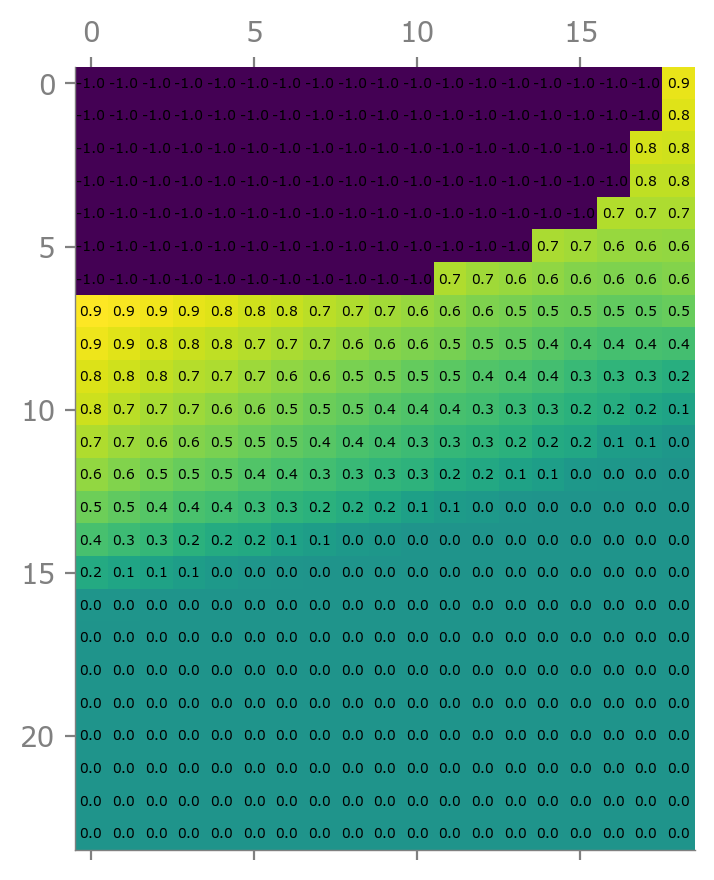

In [41]:
show_ami = np.flip(plot_subami, axis=0)
plt.matshow(show_ami)
shape = np.shape(show_ami)
for i in range(shape[0]):
        for j in range(shape[1]):
            c = show_ami[i,j]
#             print(i, j, c)
            plt.text(j, i, str(round(c, 1)), va='center', ha='center', fontsize=5)

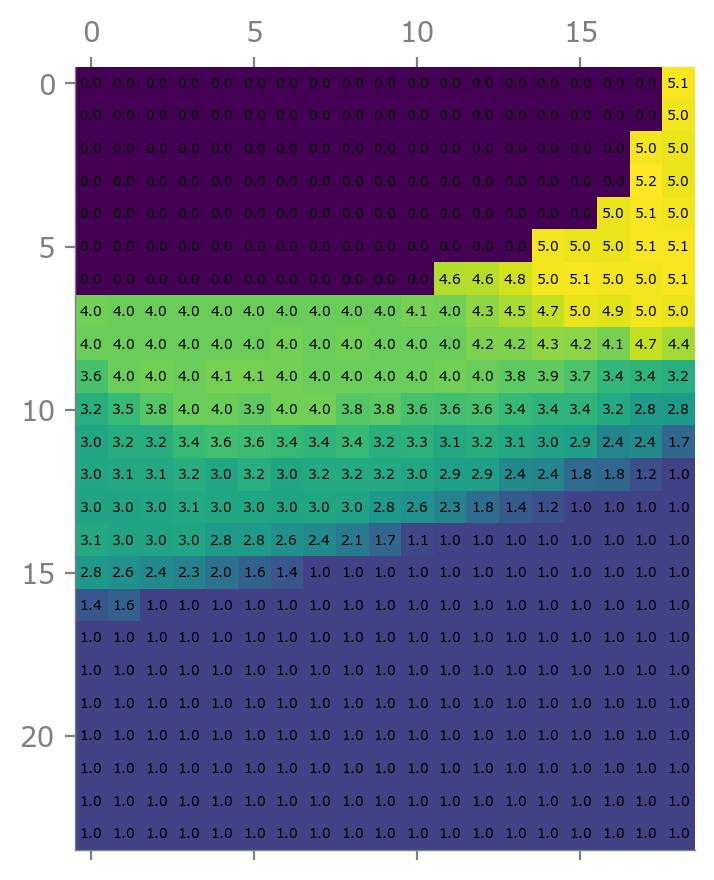

In [44]:
show_num_group = np.flip(plot_subnumgroup, axis=0)
plt.matshow(show_num_group)
shape = np.shape(show_num_group)
for i in range(shape[0]):
        for j in range(shape[1]):
            c = show_num_group[i,j]
#             print(i, j, c)
            plt.text(j, i, str(round(c, 1)), va='center', ha='center', fontsize=5)
# save_path = "./_Figure/Minority/" + "FigureMinorityAMISNR_BP_samed" + f'Z_s{Z_s}Z_b{Z_b}' + "_actual_value.pdf"
# # plt.tight_layout()
# plt.savefig(save_path, dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

#1. "BP init with BH result" for few points (a line later), to show if BH result have a lower free energy but smaller atracted bin.
#2. Treat it to 2 communities and get eigenvalue of lambda_2, lambda_1, see lambda_2^2/lambda_1.

In [4]:
print(f'rhos={np.unique(plot_rhos)}')
print(f'deltas={np.unique(plot_zs)}')

rhos=[0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26 0.28
 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48]
deltas=[0.00015 0.00029 0.00044 0.00059 0.00073 0.00088 0.00103 0.00117 0.00132
 0.00146 0.00161 0.00176 0.0019  0.00205 0.0022  0.00234 0.00249 0.00264
 0.00278 0.00293 0.00308 0.00322 0.00337 0.00351 0.00366 0.00381 0.00395
 0.0041 ]


# elbow learn by cross point

In [9]:
# For big n
n = 6000
d = 5
Z_s = 2
Z_b = 3
q = Z_s + Z_b
Withlambda = True
givenNumGroup = False
DC = False
BP = True
learnqby = None
givenTrueEpsilon = False
writeCM = False
stop_when_increasing_f = True
elbow_learn = 'cross_point'
additionId = "24.7.1_2ndType_crosspoint"
checkSNR = False
Type = 2
fileID = 'amiExp24.7.1' + f'_n={n}_Zs={Z_s}_Zb={Z_b}_d={round(d)}_{"lambda" if Withlambda else ""}_' \
                              f'{"givenNumGroup" if givenNumGroup else ""}_' \
                              f'{"DC" if DC else ""}_{"BP" if BP else ""}_' \
                              f'{"givenTrueEpsilon" if givenTrueEpsilon else ""}_{"writeCM" if writeCM else ""}_' \
                              f'{"CheckSNR" if checkSNR else ""}_elbowBy{elbow_learn}_' \
                              f'{additionId}'
load_path = "./result/detectabilityWithMeta/" + fileID + ".txt"

# add_additionId = "2ndType_3or2decimal_10more"
# add_fileId = 'amiExp24.6.3' + f'_n={n}_Zs={Z_s}_Zb={Z_b}_d={round(d)}_{"lambda" if Withlambda else ""}_' \
#                               f'{"givenNumGroup" if givenNumGroup else ""}_' \
#                               f'{"DC" if DC else ""}_{"BP" if BP else ""}_' \
#                               f'{"givenTrueEpsilon" if givenTrueEpsilon else ""}_{"writeCM" if writeCM else ""}_' \
#                               f'{"CheckSNR" if checkSNR else ""}_' \
#                               f'{add_additionId}'
# add_loadpath = ["./result/detectabilityWithMeta/" + add_fileId + ".txt"]
plot_rhos, plot_zs, sub_ami, sub_num_group, lambdas = read_exp(load_path=load_path, Withlambda=Withlambda, exclude_rho=[])
print(np.unique(plot_rhos), np.unique(plot_zs), np.size(plot_zs))

[0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26 0.28
 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48] [0.00015 0.00029 0.00044 0.00059 0.00073 0.00088 0.00103 0.00117 0.00132
 0.00146 0.00161 0.00176 0.0019  0.00205 0.0022  0.00234 0.00249 0.00264
 0.00278 0.00293 0.00308 0.00322 0.00337 0.00351 0.00366 0.00381 0.00395
 0.0041 ] 672


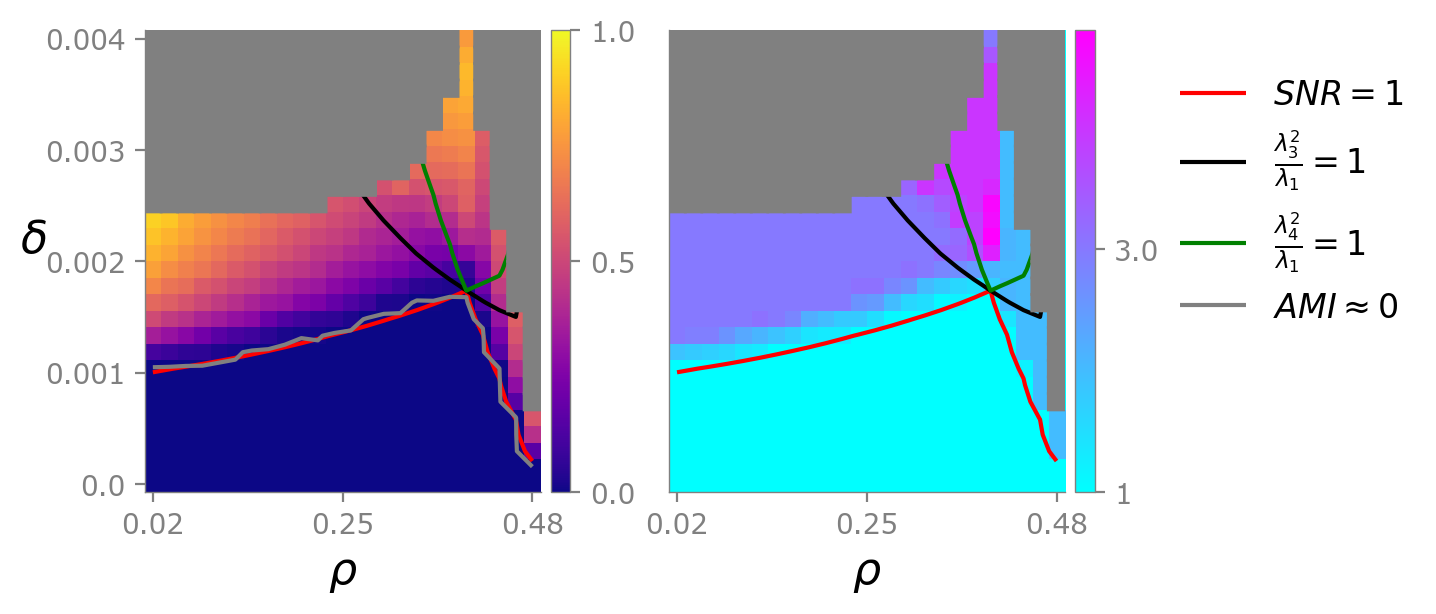

In [10]:
# figsize (width, height) with inch, 1 inch = 72 pt
fig = plt.figure(figsize=(6.2, 3))
widths = [3, 3]
heights = [3]
spec5 = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
zcenter = 0.5
plot_subami = color_imshow_2d(plot_rhos, plot_zs, sub_ami, z_center=zcenter, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', 
                              min_z=0, max_z=1, cmap=cmap, 
                              ax=ax, fig=fig, vmin=0, vmax=1, ytickprecision=3)
# ax.set_xlabel(r'$\rho$', fontsize=20)
handels = []
# handels += contour_data(plot_subami, ax, levels=[1e-3], fmt={1e-3: r'AMI$\simeq$0'}, color='gray', inline=False)
plot_snrm = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 3]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**2/lambdas[:, 0], z_center=1, return_gridz=True)
handels += contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR=1$'}, color='red', inline=False)
handels += contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black', inline=False)
handels += contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green', inline=False)

contour_subami = color_imshow_2d(plot_rhos, plot_zs, sub_ami, z_center=zcenter, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', 
                              min_z=0, max_z=1, cmap=cmap, 
                              ax=ax, fig=fig, return_gridz=True, vmin=0, vmax=1, ytickprecision=3)
x = plot_rhos
y = plot_zs
z = sub_ami
_x = np.sort(np.unique(x))
_y = np.sort(np.unique(y))
for i, zi in enumerate(z):
    if z[i] == -1:
        i_x = np.where(_x == x[i])[0]
        i_y = np.where(_y == y[i])[0]
        ax.add_patch(mpl.patches.Rectangle((i_x-.5, i_y-.5), 1, 1, hatch='///////', fill=True, snap=False, color="gray", zorder=2))
        contour_subami[i_y, i_x] = 1
handels += contour_data(contour_subami, ax, levels=[1e-2], fmt={1e-2: r'AMI$\simeq$0'}, color='gray', inline=False)
        
row = 0
col = 1
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["cool"]
zcenter = 3
plot_subnumgroup = color_imshow_2d(plot_rhos, plot_zs, sub_num_group, z_center=zcenter, title="", xlabel=r'$\rho$', ylabel=r'',
                                   min_z=1, max_z=5, cmap=cmap, 
                                   ax=ax, fig=fig, set_yticks=False, vmin=1, ytickprecision=3)
# ax.set_xlabel(r'$\rho$', fontsize=20)
plot_snrm = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 3]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**2/lambdas[:, 0], z_center=1, return_gridz=True)
contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR=1$'}, color='red', inline=False)
contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black', inline=False)
contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green', inline=False)

# contour_data(color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**(3/2)*abs(lambdas[:, 2])**(1/2)/lambdas[:, 0], z_center=1, return_gridz=True),
#              ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='yellow', inline=False)

# contour_data(color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**(3/2)*abs(lambdas[:, 3])**(1/2)/lambdas[:, 0], z_center=1, return_gridz=True),
#              ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='blue', inline=False)
for i, zi in enumerate(z):
    if z[i] == -1:
        i_x = np.where(_x == x[i])[0]
        i_y = np.where(_y == y[i])[0]
        ax.add_patch(mpl.patches.Rectangle((i_x-.5, i_y-.5), 1, 1, hatch='///////', fill=True, snap=False, color="gray", zorder=2))

lgd = fig.legend(handels, [r'$SNR=1$', r'$\frac{\lambda_3^2}{\lambda_1}=1$', r'$\frac{\lambda_4^2}{\lambda_1}=1$', r'$AMI\approx0$'], 
           loc=2, bbox_to_anchor=(0.94, 0.85),  fontsize=12, markerscale=2, frameon=False)
# save_path = "./_Figure/Minority/" + "FigureMinorityAMISNR_BP_samed" + f'd{d}Z_s{Z_s}Z_b{Z_b}' + ".pdf"
# # plt.tight_layout()
# plt.savefig(save_path, dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

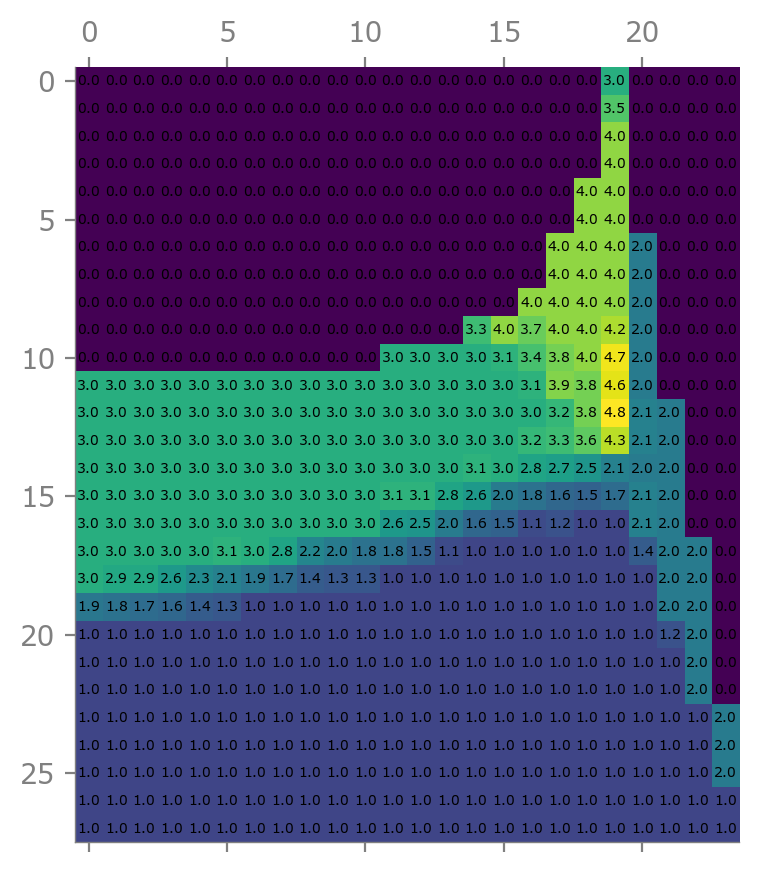

In [11]:
show_num_group = np.flip(plot_subnumgroup, axis=0)
plt.matshow(show_num_group)
shape = np.shape(show_num_group)
for i in range(shape[0]):
        for j in range(shape[1]):
            c = show_num_group[i,j]
#             print(i, j, c)
            plt.text(j, i, str(round(c, 1)), va='center', ha='center', fontsize=5)
# save_path = "./_Figure/Minority/" + "FigureMinorityAMISNR_BP_samed" + f'Z_s{Z_s}Z_b{Z_b}' + "_actual_value.pdf"
# # plt.tight_layout()
# plt.savefig(save_path, dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

# elbow learn by angle_compare


In [3]:
# For big n
n = 6000
d = 5
Z_s = 2
Z_b = 3
q = Z_s + Z_b
Withlambda = True
givenNumGroup = False
DC = False
BP = True
learnqby = None
givenTrueEpsilon = False
writeCM = False
stop_when_increasing_f = True
elbow_learn = 'angle_compare'
additionId = "24.7.11_2ndType_anglecompare"
checkSNR = False
Type = 2
fileID = 'amiExp24.7.11' + f'_n={n}_Zs={Z_s}_Zb={Z_b}_d={round(d)}_{"lambda" if Withlambda else ""}_' \
                              f'{"givenNumGroup" if givenNumGroup else ""}_' \
                              f'{"DC" if DC else ""}_{"BP" if BP else ""}_' \
                              f'{"givenTrueEpsilon" if givenTrueEpsilon else ""}_{"writeCM" if writeCM else ""}_' \
                              f'{"CheckSNR" if checkSNR else ""}_elbowBy{elbow_learn}_' \
                              f'{additionId}'
load_path = "./result/detectabilityWithMeta/" + fileID + ".txt"
plot_rhos, plot_zs, sub_ami, sub_num_group, lambdas = read_exp(load_path=load_path, Withlambda=Withlambda, exclude_rho=[])
print(np.unique(plot_rhos), np.unique(plot_zs), np.size(plot_zs))

[0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26 0.28
 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48] [0.00015 0.00029 0.00044 0.00059 0.00073 0.00088 0.00103 0.00117 0.00132
 0.00146 0.00161 0.00176 0.0019  0.00205 0.0022  0.00234 0.00249 0.00264
 0.00278 0.00293 0.00308 0.00322 0.00337 0.00351 0.00366 0.00381 0.00395
 0.0041 ] 672


minz=0, maxz=1, cticks=[0.], clabel=['0.0']
minz=1, maxz=5, cticks=[0.   0.25 0.5  0.75 1.  ], clabel=['1.0', '2.0', '3.0', '4.0', '5.0']


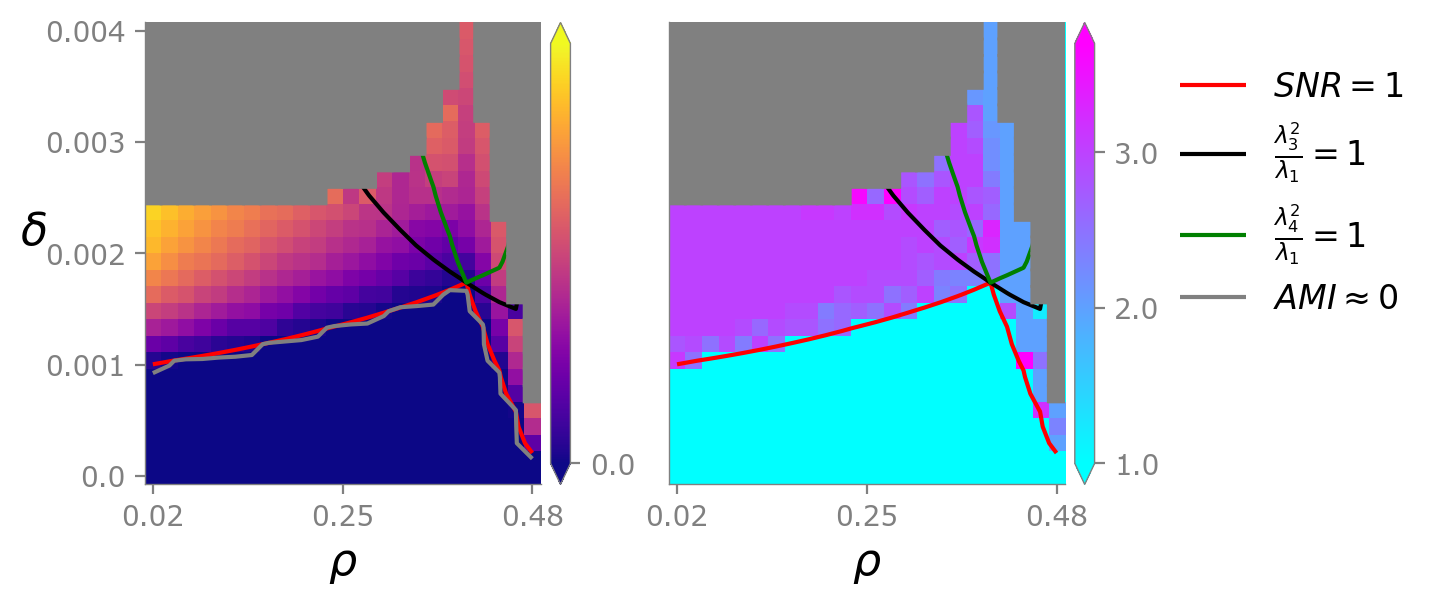

In [4]:
# figsize (width, height) with inch, 1 inch = 72 pt
fig = plt.figure(figsize=(6.2, 3))
widths = [3, 3]
heights = [3]
spec5 = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["plasma"]
zcenter = 0.5
plot_subami = color_imshow_2d(plot_rhos, plot_zs, sub_ami, z_center=zcenter, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', 
                              min_z=0, max_z=1, cmap=cmap, 
                              ax=ax, fig=fig, vmin=0, vmax=1, ytickprecision=3)
# ax.set_xlabel(r'$\rho$', fontsize=20)
handels = []
# handels += contour_data(plot_subami, ax, levels=[1e-3], fmt={1e-3: r'AMI$\simeq$0'}, color='gray', inline=False)
plot_snrm = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 3]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**2/lambdas[:, 0], z_center=1, return_gridz=True)
handels += contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR=1$'}, color='red', inline=False)
handels += contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black', inline=False)
handels += contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green', inline=False)

contour_subami = color_imshow_2d(plot_rhos, plot_zs, sub_ami, z_center=zcenter, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', 
                              min_z=0, max_z=1, cmap=cmap, 
                              ax=ax, fig=fig, return_gridz=True, vmin=0, vmax=1, ytickprecision=3)
x = plot_rhos
y = plot_zs
z = sub_ami
_x = np.sort(np.unique(x))
_y = np.sort(np.unique(y))
for i, zi in enumerate(z):
    if z[i] == -1:
        i_x = np.where(_x == x[i])[0]
        i_y = np.where(_y == y[i])[0]
        ax.add_patch(mpl.patches.Rectangle((i_x-.5, i_y-.5), 1, 1, hatch='///////', fill=True, snap=False, color="gray", zorder=2))
        contour_subami[i_y, i_x] = 1
handels += contour_data(contour_subami, ax, levels=[1e-2], fmt={1e-2: r'AMI$\simeq$0'}, color='gray', inline=False)
        
row = 0
col = 1
ax = fig.add_subplot(spec5[row, col])
cmap = mpl.colormaps["cool"]
zcenter = 3
plot_subnumgroup = color_imshow_2d(plot_rhos, plot_zs, sub_num_group, z_center=zcenter, title="", xlabel=r'$\rho$', ylabel=r'',
                                   min_z=1, max_z=5, cmap=cmap, 
                                   ax=ax, fig=fig, set_yticks=False, vmin=1, ytickprecision=3)
# ax.set_xlabel(r'$\rho$', fontsize=20)
plot_snrm = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l4overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 3]**2/lambdas[:, 0], z_center=1, return_gridz=True)
plot_l3overl1 = color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**2/lambdas[:, 0], z_center=1, return_gridz=True)
contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR=1$'}, color='red', inline=False)
contour_data(plot_l3overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_3^2}{\lambda_1}=1$'}, color='black', inline=False)
contour_data(plot_l4overl1, ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='green', inline=False)

# contour_data(color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 1]**(3/2)*abs(lambdas[:, 2])**(1/2)/lambdas[:, 0], z_center=1, return_gridz=True),
#              ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='yellow', inline=False)

# contour_data(color_imshow_2d(plot_rhos, plot_zs, lambdas[:, 2]**(3/2)*abs(lambdas[:, 3])**(1/2)/lambdas[:, 0], z_center=1, return_gridz=True),
#              ax, levels=[1], fmt={1: r'$\frac{\lambda_4^2}{\lambda_1}=1$'}, color='blue', inline=False)
for i, zi in enumerate(z):
    if z[i] == -1:
        i_x = np.where(_x == x[i])[0]
        i_y = np.where(_y == y[i])[0]
        ax.add_patch(mpl.patches.Rectangle((i_x-.5, i_y-.5), 1, 1, hatch='///////', fill=True, snap=False, color="gray", zorder=2))

lgd = fig.legend(handels, [r'$SNR=1$', r'$\frac{\lambda_3^2}{\lambda_1}=1$', r'$\frac{\lambda_4^2}{\lambda_1}=1$', r'$AMI\approx0$'], 
           loc=2, bbox_to_anchor=(0.94, 0.85),  fontsize=12, markerscale=2, frameon=False)
# save_path = "./_Figure/Minority/" + "FigureMinorityAMISNR_BP_samed" + f'd{d}Z_s{Z_s}Z_b{Z_b}' + ".pdf"
# # plt.tight_layout()
# plt.savefig(save_path, dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

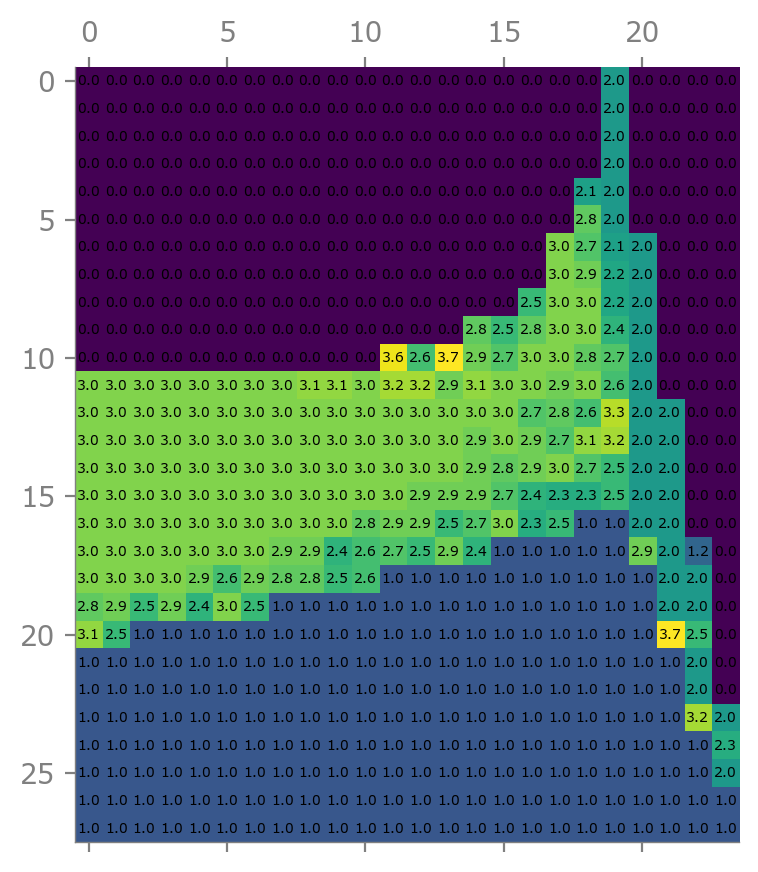

In [5]:
show_num_group = np.flip(plot_subnumgroup, axis=0)
plt.matshow(show_num_group)
shape = np.shape(show_num_group)
for i in range(shape[0]):
        for j in range(shape[1]):
            c = show_num_group[i,j]
#             print(i, j, c)
            plt.text(j, i, str(round(c, 1)), va='center', ha='center', fontsize=5)
# save_path = "./_Figure/Minority/" + "FigureMinorityAMISNR_BP_samed" + f'Z_s{Z_s}Z_b{Z_b}' + "_actual_value.pdf"
# # plt.tight_layout()
# plt.savefig(save_path, dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')